# **Project: Providing data-driven suggestions for HR**

## Description
Analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

## Deliverables
* A brief one-page summary of this project for external stakeholders. 
* The complete code notebook of the project (this document). 


## The question

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. 

They collected data from employees and they have the following question:

**What’s likely to make the employee leave the company?**

**Goal of this project**: analyze the data collected by the HR department to build a model that predicts whether or not an employee will leave the company.

Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

# The dataset – import and cleaning

The dataset is available on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).
The dataset contains 15,000 rows and 10 columns, variables listed below. 


Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

### Import packages

In [1]:
# Import needed packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


### Load dataset
The dataset is in the file **`HR_capstone_dataset.csv`.**  

In [2]:
# Load dataset into a dataframe
df0 = pd.read_csv("capstone_dataset.csv")

# Display first few rows of the dataframe
df0.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

## Initial exploratory data analysis and data cleaning
- Understand the variables
- Clean the dataset (missing data, redundant data, outliers)

In [3]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
# Gather descriptive statistics about the data
df0.describe()

satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.000000       0.000000      0.000000   
50%              200.000000            3.000000       0.000000      0.000000   
75%              245.000000            4.000000       0.000000      0.000000   
max              310.000000           10.000000       1.000000      1.000000   

       promotion_last_5years  
count           14999.000000  
mean                0.021268  
std                 0.144281  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

### Rename columns
Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [6]:
# Display all column names
df0.keys()

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [7]:
# Rename specific columns
new_names = {'number_project': 'number_projects'
             , 'time_spend_company': 'time_spent_company'
            , 'Work_accident':'work_accident'
             , 'promotion_last_5years':'promotion_last_5_years'
             , 'Department':'department'
             , 'left':'left_yn'
            }
data = df0.copy()
data = data.rename(columns=new_names)

# Display all column names after the update
data.keys()

Index(['satisfaction_level', 'last_evaluation', 'number_projects',
       'average_montly_hours', 'time_spent_company', 'work_accident',
       'left_yn', 'promotion_last_5_years', 'department', 'salary'],
      dtype='object')

### Check for missing values

In [8]:
# Check for missing values
data.isna().any()

satisfaction_level        False
last_evaluation           False
number_projects           False
average_montly_hours      False
time_spent_company        False
work_accident             False
left_yn                   False
promotion_last_5_years    False
department                False
salary                    False
dtype: bool

Result: no apparent missing value in the data

### Check for duplicates

In [9]:
# Check for duplicates
print(data.duplicated().any())

True


In [10]:
# Count duplicates
data.duplicated().sum()

np.int64(3008)

In [11]:
# Inspect some rows containing duplicates
data[data.duplicated()].head()

satisfaction_level  last_evaluation  number_projects  \
396                 0.46             0.57                2   
866                 0.41             0.46                2   
1317                0.37             0.51                2   
1368                0.41             0.52                2   
1461                0.42             0.53                2   

      average_montly_hours  time_spent_company  work_accident  left_yn  \
396                    139                   3              0        1   
866                    128                   3              0        1   
1317                   127                   3              0        1   
1368                   132                   3              0        1   
1461                   142                   3              0        1   

      promotion_last_5_years  department  salary  
396                        0       sales     low  
866                        0  accounting     low  
1317                       0       sales  medium  
1368                       0       RandD     low  
1461                       0       sales     low

In [12]:
# Drop duplicates
data.drop_duplicates(keep='first', inplace=True)

# Check that there are no remaining duplicated data
print(data.duplicated().any())

# Display first few rows of new dataframe
data.head()

False


satisfaction_level  last_evaluation  number_projects  average_montly_hours  \
0                0.38             0.53                2                   157   
1                0.80             0.86                5                   262   
2                0.11             0.88                7                   272   
3                0.72             0.87                5                   223   
4                0.37             0.52                2                   159   

   time_spent_company  work_accident  left_yn  promotion_last_5_years  \
0                   3              0        1                       0   
1                   6              0        1                       0   
2                   4              0        1                       0   
3                   5              0        1                       0   
4                   3              0        1                       0   

  department  salary  
0      sales     low  
1      sales  medium  
2      sales  medium  
3      sales     low  
4      sales     low

### Check for outliers
Certain types of models are more sensitive to outliers than others. Therefore, we should consider whether to remove the outliers.

In [13]:
# Check the data types, in particular to isolate categorical data.
data.dtypes

satisfaction_level        float64
last_evaluation           float64
number_projects             int64
average_montly_hours        int64
time_spent_company          int64
work_accident               int64
left_yn                     int64
promotion_last_5_years      int64
department                 object
salary                     object
dtype: object

In [14]:
# Explore the range of the categorical data
print(
    "salary range: ", data.salary.unique(), 
    "\ndepartment range: ", data.department.unique()
)

salary range:  ['low' 'medium' 'high'] 
department range:  ['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']


**"salary"** could be converted into numeric data since it is on a linear scale. Additional data from the company would be needed to clarify what 'low' 'medium' 'high' salary mean in term of annual salary in dollars. The lack of this information would mean having to make some gross assumptions, as giving an arbitrary number to each one of the unique entries, ex. ['low' 'medium' 'high'] = [0, 0.5, 1], which would make an outlier analysis not meaningful.

**"department"** cannot be easily be converted into numerical data, so no outlier analysis based on boxplots will be possible. An hystogram analysis is still possible. 

In [ ]:
# Optional – Replaces the categorical salary values with numerical values
salary_dic = {'low': 0, 'medium': 0.5, 'high': 1} # salary replacement dictionary
data_numeric.salary.replace(salary_dic, inplace=True) # replace values in-place
data_numeric.salary.unique() # show the unique values of the "salary" column

In [7]:
# Explore the composition and range of the numeric data
keys_numeric = data.keys().drop(["salary", "department"])

# get the number of unique value for each numeric column
data[keys_numeric].nunique()

satisfaction_level         92
last_evaluation            65
number_projects             6
average_montly_hours      215
time_spent_company          8
work_accident               2
left_yn                     2
promotion_last_5_years      2
dtype: int64

The variables "work_accident", "left_yn", and "promotion_last_5_years" are actually boolean data since they are composed of just 0 or 1, meaning NO and YES. Therefore, no outliers analysis can be performed on them. 


Even if outlier analysis works best on continuous data, it can still be performed with a degree of meaning on the categories "number_projects" (6 unique values) and "time_spent_company" (8 unique values).
Of course, outlier analysis can be performed on "satisfaction_level", "last_evaluation", average_montly_hours since they are practically continuous variables.

In [8]:
# Create a new dataframe with only numeric variables.

# Isolate the categoric variables
keys_cat = ["department","salary", "work_accident", "left_yn", "promotion_last_5_years"]

# Create the only-numeric dataframe data_numeric
data_numeric = data.copy() # new dataframe
data_numeric.drop(keys_cat, axis="columns", inplace=True) # drop the categoric column in-place
data_numeric.keys() # show the remaining columns

Index(['satisfaction_level', 'last_evaluation', 'number_projects',
       'average_montly_hours', 'time_spent_company'],
      dtype='object')

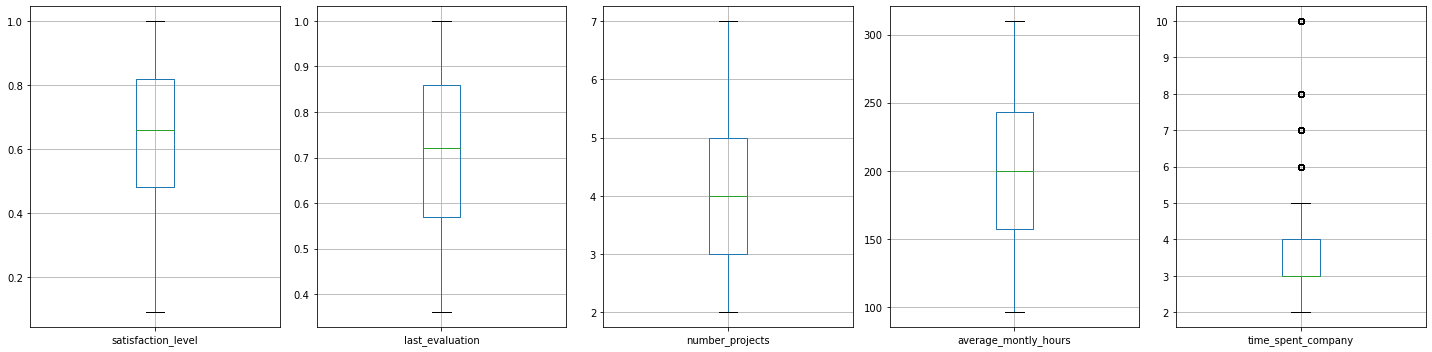

In [13]:
# Create boxplots to visualize the distribution of the numeric variables and detect any outliers

# Create a figure
plt.figure(figsize=(20, 5))

for i, key in enumerate(data_numeric.keys()):
    plt.subplot(1, len(data_numeric.keys()), i+1) # (rows, columns, current index)
    data_numeric.boxplot(key)

plt.tight_layout()
plt.show()

Seems that only the variable "time_spent_company" has outliers. Let's verify this with a histogram analysis.

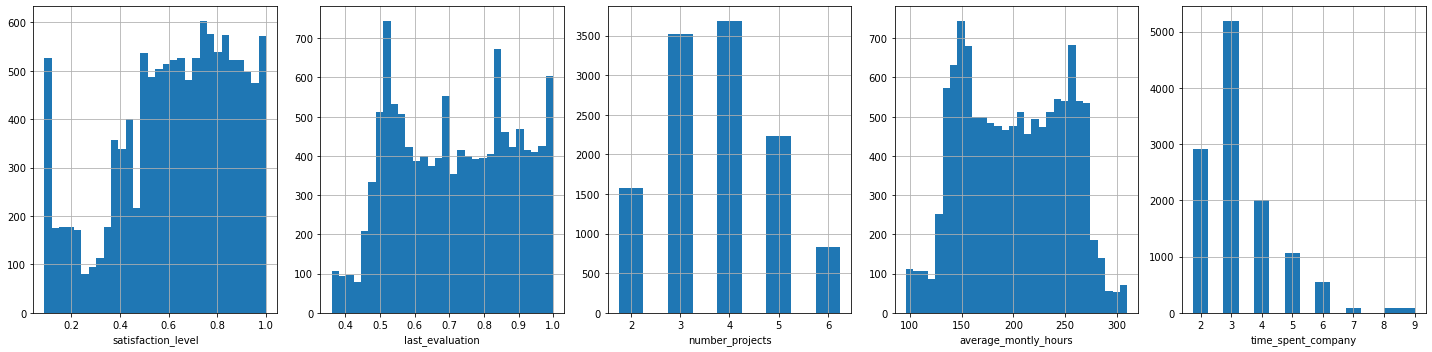

satisfaction_level  last_evaluation  number_projects  \
count        11991.000000     11991.000000     11991.000000   
mean             0.629658         0.716683         3.802852   
std              0.241070         0.168343         1.163238   
min              0.090000         0.360000         2.000000   
25%              0.480000         0.570000         3.000000   
50%              0.660000         0.720000         4.000000   
75%              0.820000         0.860000         5.000000   
max              1.000000         1.000000         7.000000   

       average_montly_hours  time_spent_company  
count          11991.000000        11991.000000  
mean             200.473522            3.364857  
std               48.727813            1.330240  
min               96.000000            2.000000  
25%              157.000000            3.000000  
50%              200.000000            3.000000  
75%              243.000000            4.000000  
max              310.000000           10.000000

In [41]:
# Create a figure
plt.figure(figsize=(20, 5))

for i, key in enumerate(data_numeric.keys()):
    plt.subplot(1, len(data_numeric.keys()), i+1) # (rows, columns, current index)
    if data_numeric[key].nunique() > 30:
        bins = 30
        data_numeric[key].hist(bins=bins)
    else:
        uniques = data_numeric[key].unique()
        uniques = np.sort(uniques)
        step = abs(uniques[0] - uniques[1])
        bin_width = step/2
        bins = uniques - bin_width
        data_numeric[key].hist(bins=bins, rwidth=bin_width)
        
    plt.xlabel(key)

plt.tight_layout()
plt.show()

data_numeric.describe()

Only the variable "time_spent_company" has outliers. Let's analyze it better. 

Outliers
  lower bound: 1.5 years
  upper bound: 5.5 years


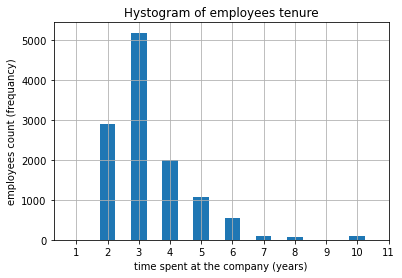

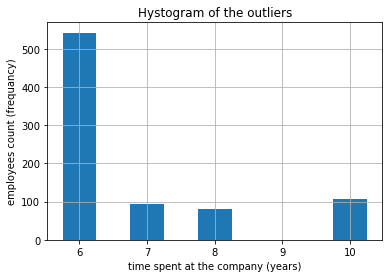

In [48]:
# Outliers analysis for the "time_spent_company" variable

# calculate the first and third quartiles
q1 = data.time_spent_company.quantile(0.25)
q3 = data.time_spent_company.quantile(0.75)

# calculate the interquartile range
inter_quartile = q3 - q1

# define the range for outliers
outlier_range = 1.5 * inter_quartile

# calculate the range out of which it is considered an outlier
lower_bound = q1 - outlier_range
upper_bound = q3 + outlier_range

print("Outliers")
print('  lower bound:', lower_bound, "years")
print('  upper bound:', upper_bound, "years")

# Hystogram of all the employees
data.time_spent_company.hist(bins= np.arange(1,12) - 0.5, rwidth=0.5)
plt.xlabel("time spent at the company (years)")
plt.ylabel("employees count (frequancy)")
plt.xticks(np.arange(1,12))
plt.title("Hystogram of employees tenure")
plt.show()

# Hystogram of the outliers only
bool_mask = (data["time_spent_company"] > upper_bound) | (data["time_spent_company"] < lower_bound)
data.time_spent_company[bool_mask].hist( \
    bins= np.arange(6,12) - 0.5, rwidth=0.5)
plt.xlabel("time spent at the company (years)")
plt.ylabel("employees count (frequancy)")
plt.title("Hystogram of the outliers")
plt.show()

It appears that something happened 9 years ago and there was no hiring in that time, so none has spent exactly 9 years at the company. Let's verify this:

In [54]:
print("Number of employees with 9 years tenure:",
data.time_spent_company[data["time_spent_company"] == 9].count()
     )

Number of employees with 9 years tenure: 0


# Main Data Exploration

### Data visualizations
Let's visualize the data looking for relationships between the variables.

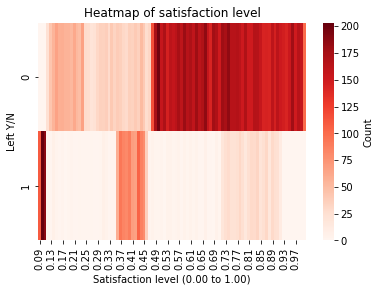

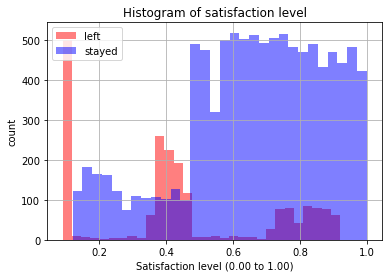

In [118]:
import seaborn as sns # import the seaborn visualization package

# Divide the data between the groups of employees that stayed vs left,
# so to highlight the differences in behaviour between these two groups
left = data[data.left_yn == 1]
stayed = data[data.left_yn == 0]


# Heatmap of "satisfaction level" for the two groups LEFT and STAYED
sns.heatmap(
            pd.crosstab(data['left_yn'], data["satisfaction_level"])
           , cmap="Reds"#, norm=LogNorm() # uncomment for log scale
           , cbar_kws={'label': 'Count'}
            )
plt.ylabel ("Left Y/N") # y label
plt.xlabel("Satisfaction level (0.00 to 1.00)") # x label
plt.title("Heatmap of satisfaction level") # title
plt.show()


# Histogram of "satisfaction level" for the two groups LEFT and STAYED
left.satisfaction_level.hist(bins=30, label = "left", alpha = 0.5, color="red")
stayed.satisfaction_level.hist(bins=30, label = "stayed", alpha = 0.5, color="blue")

plt.legend() # shows legend
plt.ylabel ("count") # y label
plt.xlabel("Satisfaction level (0.00 to 1.00)") # x label
plt.title("Histogram of satisfaction level") # title

plt.show() # shows plots

From the Heatmap: 
 - Employees who STAYED had a sufficient (> 0.5) satisfaction level and they appear to be just one group.
 - Employees who LEFT can be divided into 2, maybe 3 groups. Let's plot an histogram to verify this.
 
 
 From the Histogram:
 - Employees who LEFT are bunched into 3 groups: very low satisfaction around 0.1 (practically zero), low satisfaction around 0.4, and high satisfaction around 0.8. Notice that the distribution of for the very-low-satisfaction group is very narrow, meaning that this is a major indicator for employees to leave.
 - Employees who STAYED: we can say that if an employee satisfaction level is > 0.5, it will almost always stay. Over this threshold, the distribution is practically uniform, which means there is no corelation between satisfaction level and staying over the 0.5 threshold. Interesting to notice that there is a significant number of employees with low satisfaction (< 0.5) who stayed, and also in this case the distribution is almost uniform. 
 
 
 Now, let's make histograms of all the variables to highlight other dependencies. 

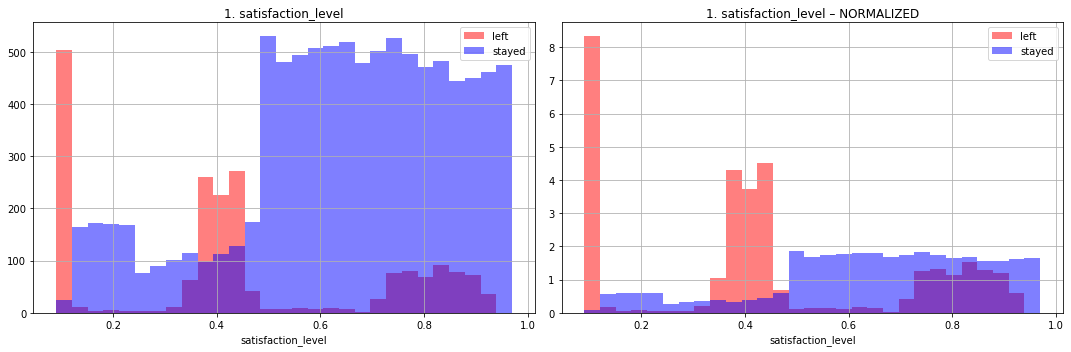

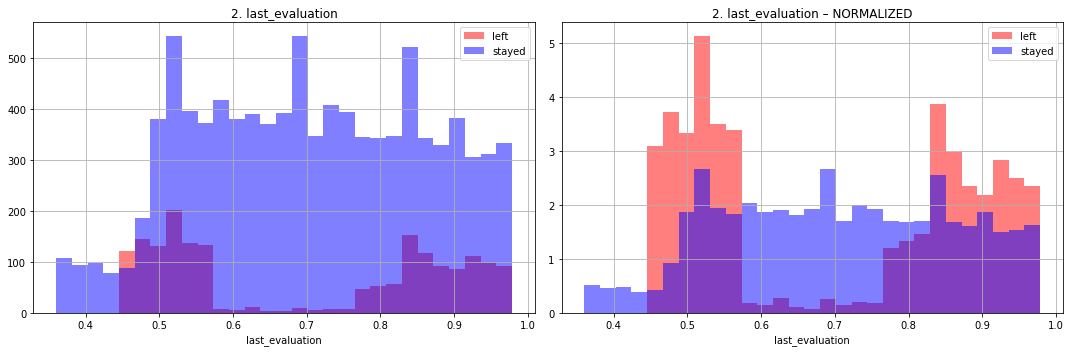

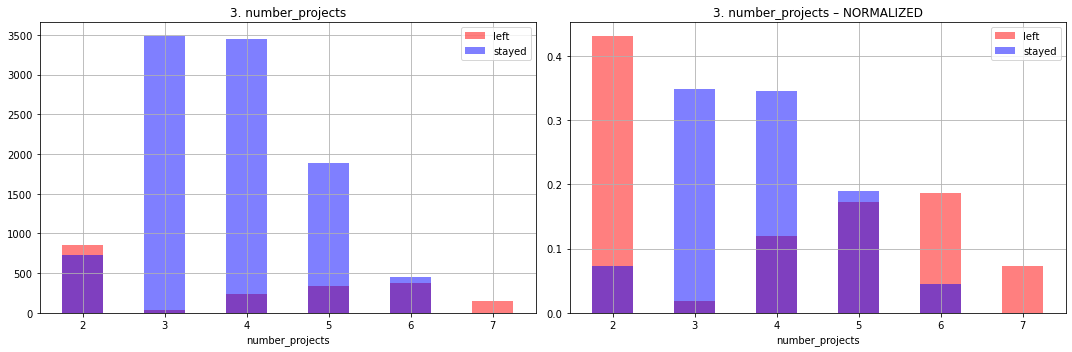

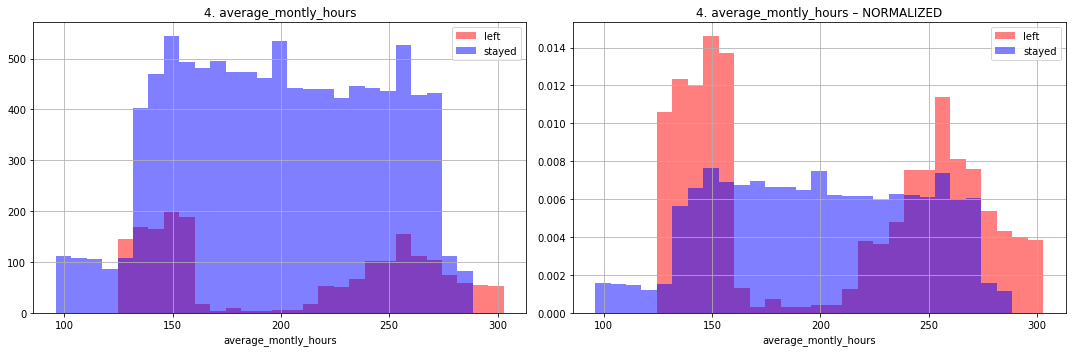

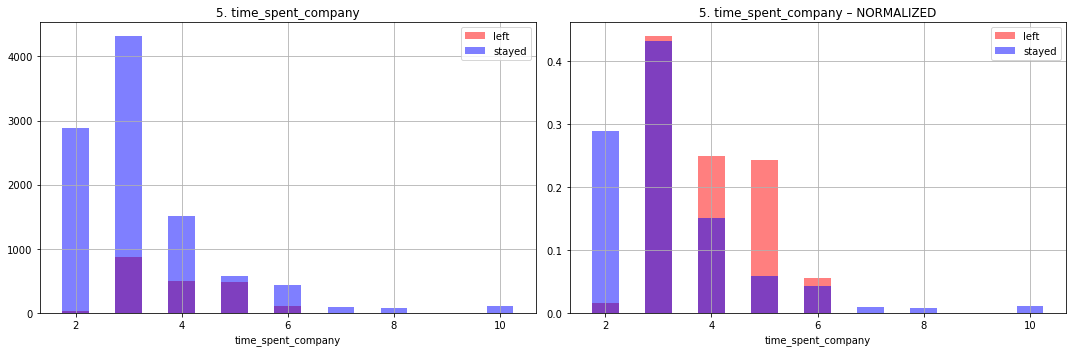

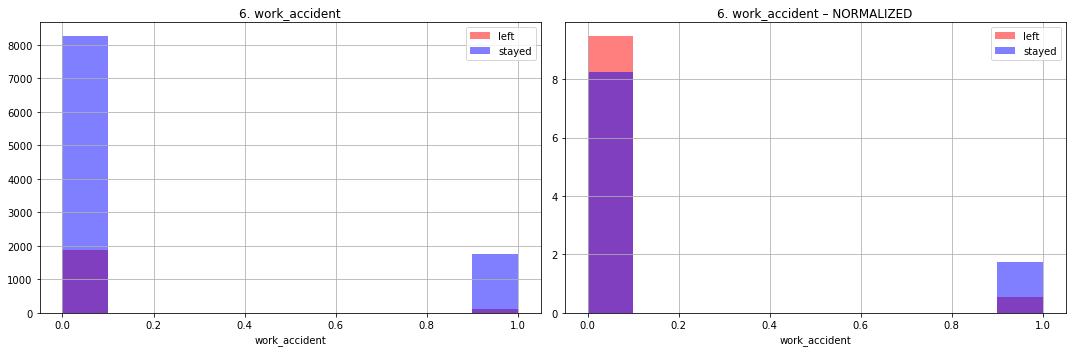

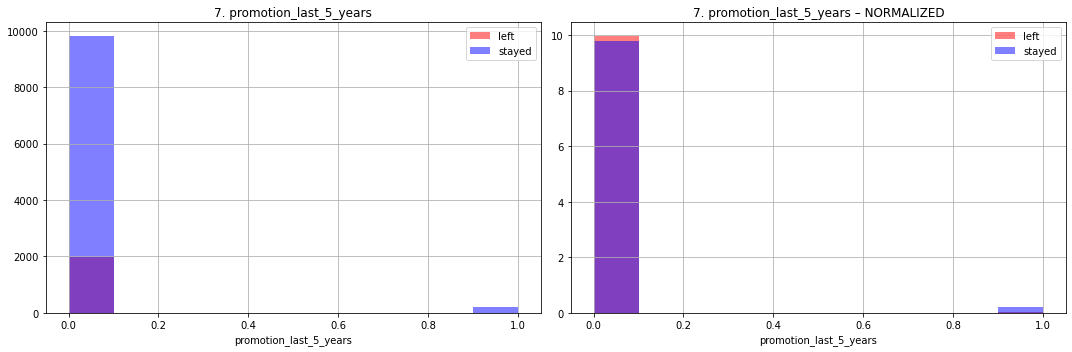

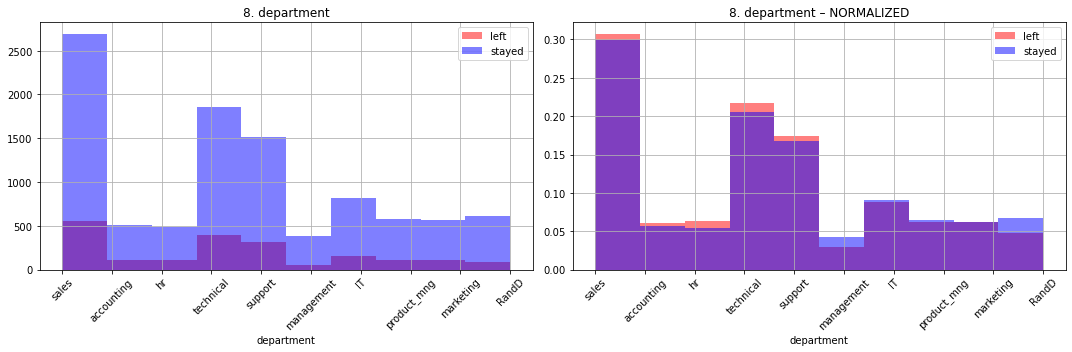

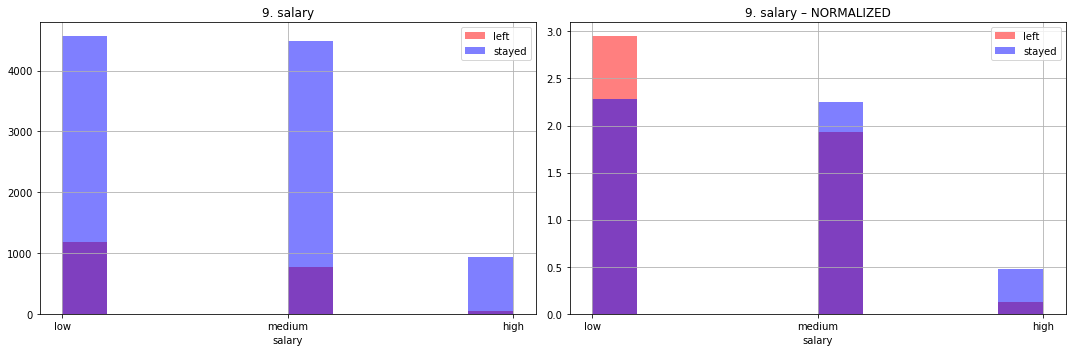

In [139]:
# Histograms of the employees who left or stayed against all the other variables
# to hightlight straight dependencies.
# We used both standard histograms and normalized histograms, that are divided by 
# the count of the employess is each of the grops STAYED and LEFT.

# Divide the data between the groups of employees that stayed vs left,
# so to highlight the differences in behaviour between these two groups
left = data[data.left_yn == 1]
stayed = data[data.left_yn == 0]

# list of variables to iterate over
keys_iter = data.keys().drop("left_yn") # remove the "left_yn" variable from iteration

# bins in the histograms with continuous variables
bins_n = 30

# iteration over the variables
for i, key in enumerate(keys_iter):
    
    #plt.figure(figsize=(12, 6))  # Set the figure size

    if data[key].dtype == 'object' and data[key].nunique() > 4:
        bins = data[key].nunique()
        bin_width = None
        x_label_rotation = 45    

    elif data[key].nunique() > bins_n:
        step = (max(data[key])-min(data[key]))/bins_n
        bins = np.arange(min(data[key]), max(data[key]), step)
        bin_width = 1
        x_label_rotation = None
        
    elif data[key].nunique() <= 3:
        bins = None
        bin_width = None
        x_label_rotation = None
        
    else:
        x_label_rotation = None
        uniques = data[key].unique()
        uniques = np.sort(uniques)
        step = abs(uniques[0] - uniques[1])
        bin_width = step/2
        begin = min(uniques) - bin_width
        end = max(uniques) + 1
        bins = np.arange(begin, end)

    # create a figure
    plt.figure(figsize=(15, 5))
        
    # Histograms
    plt.subplot(1, 2, 1) # create the first subplot
    left[key].hist(alpha=0.5, label="left", color="Red", 
                   bins=bins, rwidth=bin_width, xrot=x_label_rotation)
    stayed[key].hist(alpha=0.5, label="stayed", color="Blue", 
                     bins=bins, rwidth=bin_width, xrot=x_label_rotation)    
    plt.xlabel(key)
    plt.title(str(i+1) + ". " + key)  # Set the title
    plt.legend()
    
    # Histograms – NORMALIZED
    plt.subplot(1, 2, 2) # create the second subplot
    left[key].hist(alpha=0.5, label="left", color="Red", 
                   bins=bins, rwidth=bin_width, xrot=x_label_rotation, density=1)
    stayed[key].hist(alpha=0.5, label="stayed", color="Blue", 
                     bins=bins, rwidth=bin_width, xrot=x_label_rotation, density=1)    
    plt.xlabel(key)
    plt.title(str(i+1) + ". " + key + " – NORMALIZED")  # Set the title
    plt.legend()

    plt.tight_layout()  # Adjust the spacing between subplots
    plt.show()  # Display the pair of heatmaps

There are a few insights that we can deduct from each pair of histograms.

1. Satisfaction Level – The previous considerations hold true, while from the normalized histogram, it is even more clear that a low satisfaction level is a major indicator for an employee to leave.

2. Last Evaluation – Employees who STAYED had mostly a sufficient evaluation (> 0.5), while employeed who left can be divided into two groups: mediocre evaluation around 0.5, and very good evaluation around 0.9. From these data, it seems that there is no strong correlation between evaluation level and an employee leaving, or staying. This may be an indication of the inability from the management to evaluate the employees correctly, which may lead to a non-meritocratic working environment. 

3. Number of Project – Everyone with 7 project left. 

In [219]:
stayed[stayed.number_projects >= 7].left_yn.count()

0

People with 3 projects have the highest probability of staying, out of this number, the probability of leaving increases sharply. People with only 2 projects have the highest probability of leaving. However, this may be because they were fired, pushed to leave or wanted already to leave so they were closing the projects where they were involved and not given new projects. The probability to leave increases significatively already with 4 projects, and all the people with 7 projects left. Probably these people were overworked/burned-out or/and feeling unappreciated for their work. *It could be interested to examine the distribution of the number of hours per project, for the people who LEFT or STAYED, since too much work fragmentation can cause people to burn out or feel overwhelmed.* However, since already with 4 project we have a sharp increase of people leaving, here we have our first recommendation: **The projects number should be capped to 3.**

4. Average Montly Hours – The people with average monthly hours at the fringes of the distribution have a significant probability of leaving, so people with montly hours much lower or higher than the average. People with low monthly hours were probably with one foot out of the door already. People with high monthly hours are probably leaving because of being burned out, feeling underappreciated or finding better opportunities where their high dedication is appreciated. If we consider 40h of work per week, and an average of 50 work-weeks per year (in the US), we could expect an average montly hours of 40-hours * 50-weeks / 12-months = 166.6-hours. We can see that people between 167h (40h/week) and 210h (50h/week) have an almost zero probability of leaving. At the same time, we can see that most of the employees work more than 40h/week (68%) and more than 50h/week (44%), calculation below.  

In [147]:
print("Employee population that work more than 40h / week:", round(
(data.average_montly_hours[data.average_montly_hours > 167].count() / 
data.average_montly_hours.count())*100)
     , "%")
print("Employee population that work more than 50h / week:", round(
(data.average_montly_hours[data.average_montly_hours > 210].count() / 
data.average_montly_hours.count())*100)
     , "%")

Employee population that work more than 40h / week: 68 %
Employee population that work more than 50h / week: 44 %


Therefore, it is likely that the company culture pushes the employees to work long hours, till burn-out. It could be interested to measure if this company culture is worth it, but for this additional data would be needed: 

- If the additional hours above 40h/week are not paid by the company, these additional hours could be worth some employees leaving. 

- Do the additional hours correspond to an equivalent increase in productivity, or the employee just stays longer at the company and working less efficiently? The productivity cannot be measured in the number of projects since projects could have different size. **We recommend the management to introduce Key Performance Indicators to measure the productivity of employees and the productivity per hour.** It may result that the productivity plummets above 40h/week, as in the famous study that led Henry Ford to eastablish the 40h work week in his factories.

Moreover, we should investigate the following question: *Do additional hours correspond to promotions and higher salary?* 
If not, this may be a strong indicator of a non-meritocratic company culture, that dedicated workers would leave.  

5. Time Spent at the Company – No employee that stayed 7 years or more will leave. 

In [218]:
left[left.time_spent_company >= 7].left_yn.count()

0

Most of the employees leave between the 3rd and 5th year. This may be caused by not receiving a promotion or a raise, so becoming a "high" in the salary category. It could be interested to investigate if the people with tenure 7 years or longer are disproportionately in the "high" salary category or received a promotion. If not, this may be an indication that these people stayed for some personal reason, ex. living nearby and not being willing to relocate. 

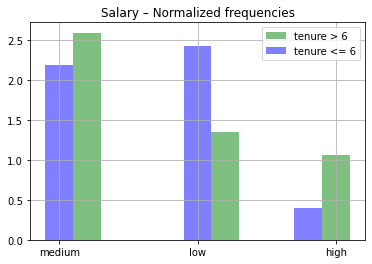

Salary vs long or short tenure
        tenure > 6 years, %  tenure <= 6 years, %
high                   21.0                   8.0
medium                 52.0                  44.0
low                    27.0                  48.0


In [193]:
# Long-tenure employees vs salary

# Division of the employees between long-tenure (> 6 years) and short tenure (<= 6 years)
long_tenure = (data.time_spent_company > 6)
short_tenure = (data.time_spent_company <= 6)

# Hystograms (Normalized)
data[long_tenure].salary.hist(density=1, label="tenure > 6", color="Green", alpha=0.5, 
                              align="right")
data[short_tenure].salary.hist(density=1, label="tenure <= 6", color="Blue", alpha=0.5, 
                               align="left")

plt.title("Salary – Normalized frequencies")
plt.legend()
plt.show()

# Percentages
salary_tenure = pd.DataFrame({
                "tenure > 6 years, %" : round(data[long_tenure].salary.value_counts(normalize=True)*100),
                "tenure <= 6 years, %" : round(data[short_tenure].salary.value_counts(normalize=True)*100)
                })
salary_tenure = salary_tenure.reindex(["high", "medium", "low"])
print("Salary vs long or short tenure")
print(salary_tenure)

As expected, long tenures have a disproportionately higher percent of high-salary earners. However, there is to notice that 1/2 of the long tenures have a medium salary, and about 1/4 has a low salary. These may be employees who stayed because of personal reasons or comfort reasons. This may be an important indication for future hirings: **an employee is more likely to stay if he/she has personal reasons to stay into the company or in the geographic area.** 

Now, let's analyze the long tenures vs promotion in the last 5 years.

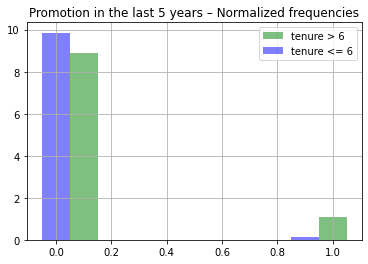

Promoted vs long or short tenure
   tenure > 6 years, %  tenure <= 6 years, %
0                 89.0                  99.0
1                 11.0                   1.0


In [197]:
# Promoted employees vs salary

# Division of the employees between long-tenure (> 6 years) and short tenure (<= 6 years)
long_tenure = (data.time_spent_company > 6)
short_tenure = (data.time_spent_company <= 6)

# Hystograms (Normalized)
data[long_tenure].promotion_last_5_years.hist(density=1, label="tenure > 6", color="Green", alpha=0.5, 
                              align="right")
data[short_tenure].promotion_last_5_years.hist(density=1, label="tenure <= 6", color="Blue", alpha=0.5, 
                               align="left")

plt.title("Promotion in the last 5 years – Normalized frequencies")
plt.legend()
plt.show()

# Percentages
promotion_tenure = pd.DataFrame({
                "tenure > 6 years, %" : round(data[long_tenure].promotion_last_5_years.value_counts(normalize=True)*100),
                "tenure <= 6 years, %" : round(data[short_tenure].promotion_last_5_years.value_counts(normalize=True)*100)
                })
print("Promoted vs long or short tenure")
print(promotion_tenure)

A disproportionate fraction of the promoted employees had a long tenure, about ten times more than the short-tenure. This may indicate that promotion is mostly based on tenure on the job, to verify with further analysis. To notice about 90% of the long tenure not having had a promotion in the last 5 years. This may indicate that they had a promotion before than 5 years ago, or that they did not received any promotion and they are staying for personal reasons. Additional data in the promotions between 5 and 10 years ago may clarify this point. 

Now, let's analyze other variables vs long tenure.

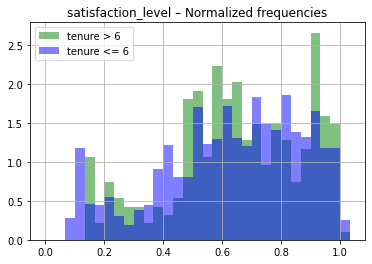

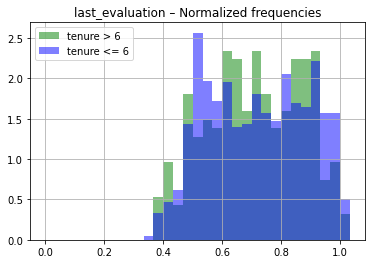

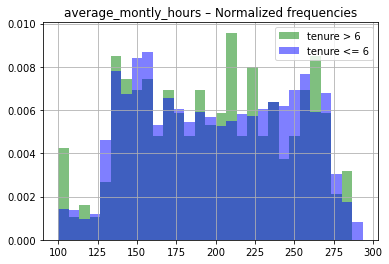

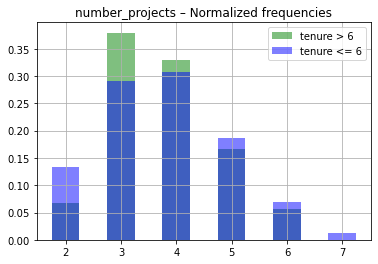

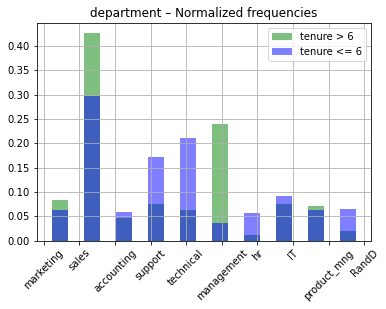

In [239]:
# Hystograms (Normalized) vs LONG TENURES

# satisfaction level
step = 1 / 30
bins = np.arange(0,1+step,step)
data[long_tenure].satisfaction_level.hist(bins=bins, density=1, 
                                          label="tenure > 6", color="Green", alpha=0.5)
data[short_tenure].satisfaction_level.hist(bins=bins, density=1, 
                                           label="tenure <= 6", color="Blue", alpha=0.5)
plt.title("satisfaction_level – Normalized frequencies")
plt.legend()
plt.show()


# last evaluation
data[long_tenure].last_evaluation.hist(bins=bins, density=1, 
                                          label="tenure > 6", color="Green", alpha=0.5)
data[short_tenure].last_evaluation.hist(bins=bins, density=1, 
                                           label="tenure <= 6", color="Blue", alpha=0.5)
plt.title("last_evaluation – Normalized frequencies")
plt.legend()
plt.show()


# average monthly hours
step = 200 / 30
bins = np.arange(100,300,step)
data[long_tenure].average_montly_hours.hist(bins=bins, density=1, 
                                          label="tenure > 6", color="Green", alpha=0.5)
data[short_tenure].average_montly_hours.hist(bins=bins, density=1, 
                                           label="tenure <= 6", color="Blue", alpha=0.5)
plt.title("average_montly_hours – Normalized frequencies")
plt.legend()
plt.show()


# number of projects
step = 1
bins = np.arange(1.5,8,step)
data[long_tenure].number_projects.hist(bins=bins, density=1, rwidth=0.5,
                                          label="tenure > 6", color="Green", alpha=0.5, align="mid")
data[short_tenure].number_projects.hist(bins=bins, density=1, rwidth=0.5,
                                           label="tenure <= 6", color="Blue", alpha=0.5, align="mid")
plt.title("number_projects – Normalized frequencies")
plt.legend()
plt.show()

# department
data[long_tenure].department.hist(density=1, rwidth=0.5, xrot=45,
                                          label="tenure > 6", color="Green", alpha=0.5, align="mid")
data[short_tenure].department.hist(density=1, rwidth=0.5, xrot=45,
                                           label="tenure <= 6", color="Blue", alpha=0.5, align="mid")
plt.title("department – Normalized frequencies")
plt.legend()
plt.show()

It seems that there is no correlation between long tenure (>6 years) and satisfaction level, last evaluation mark and hours worked per month. The correlation with the number of projects is also slim, with slightly more long-tenures working 3 projects and less working 2 projects. There is instead a very strong correlation with the department. In particular, the management department seems dominated by long-tenures, that would make sense since the management need to be experienced and it is likely populated by the employees who received a promotion. 

The sales department is also more populated by long tenures, but here the correlation is slimmer, with just 1/3 more incidence than the short-tenure population. HR is dominated by short-tenures, as well as product_mng, technical and support. 

6. Work Accidents – From the normalized histogram, it appears that the people who stayed had a significant higher incidence of work accidents, probably because they had longer tenures and so more time to get into accidents. If this hypothesis is true, the accidents incidence should be correlated with the tenure.

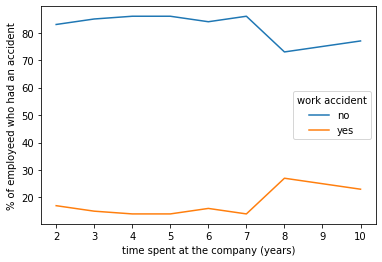

In [266]:
accident_tenure = round(pd.crosstab(data.time_spent_company, data.work_accident, normalize="index")*100)

accident_tenure[0].plot.line(label="no")
accident_tenure[1].plot.line(label="yes")
plt.ylabel("% of employeed who had an accident")
plt.xlabel("time spent at the company (years)")
plt.legend(title="work accident")
plt.show()

The probability to have a work accident increases with time, but it is also high at the beginning with inexperienced employees, as visible with the peak at 2 years. 

7. Promotion in the Last 5 Years – Getting a promotion in the last 5 years strongly decreases the probability of leaving, from 17% to 4% of incidence (below). 

In [302]:
promotion_left = round(pd.crosstab(data.promotion_last_5_years, data.left_yn,
                                   normalize="index") , 2)

promotion_left = promotion_left.rename(
                                    columns={0:"stayed", 1:"left"}, 
                                    index={0:"not-promoted",1:"promoted"})
promotion_left.columns.name = "Employee"
promotion_left.index.name = 'promoted in the last 5 years'
promotion_left

Employee                      stayed  left
promoted in the last 5 years              
not-promoted                    0.83  0.17
promoted                        0.96  0.04

However, there are still employees who were promoted but left. Let's investigate more them, in particular if they were unsatisfied.

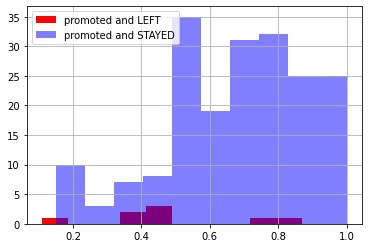

      satisfaction_level  last_evaluation  number_projects  \
18                  0.45             0.51                2   
82                  0.79             0.59                4   
171                 0.41             0.46                2   
287                 0.11             0.79                6   
584                 0.41             0.56                2   
751                 0.46             0.45                2   
1000                0.87             1.00                4   
1667                0.44             0.55                2   

      average_montly_hours  time_spent_company  work_accident  left_yn  \
18                     160                   3              1        1   
82                     139                   3              0        1   
171                    160                   3              0        1   
287                    292                   4              0        1   
584                    154                   3              0        1 

In [303]:
# Division into the two groups, that were promoted but LEFT or STAYED
promoted_and_left = ((data.promotion_last_5_years == 1) & (data.left_yn == 1))
promoted_and_stayed = ((data.promotion_last_5_years == 1) & (data.left_yn == 0))

# Histograms
data[promoted_and_left].satisfaction_level.hist(color="Red", label="promoted and LEFT")
data[promoted_and_stayed].satisfaction_level.hist(alpha=0.5, color="Blue", label="promoted and STAYED")
plt.legend()
plt.show()

# print the promoted who left
print(data[promoted_and_left])

The employees that were promoted and left were more unsatisfied than the average employees. Their number is just 8, so too low to make a relevant distribution analysis on the continuous variables. However, we can analyze them one by one in the printed table. It appears that the only similarity between these employees is that their salary was between low and medium, so lower than the one expected for a promoted employee. We can verify this by analyzing the distriution of the two groups against the salary.

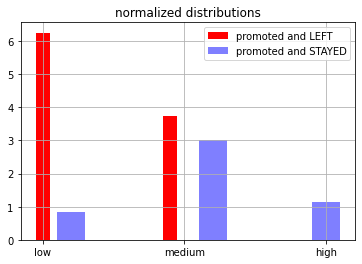

In [306]:
data[promoted_and_left].salary.hist(density=1, color="Red", label="promoted and LEFT", align="left")
data[promoted_and_stayed].salary.hist(alpha=0.5, density=1, color="Blue", label="promoted and STAYED",
                                     align="right")
plt.legend()
plt.title("normalized distributions")
plt.show()

None of the promoted employees who had a high salary left, and we can see a clear inverse correlation between high salary and leaving. Is possible that for the promoted employees who left, the promotions came with little or no salary increase, and were promotions just in title. Seen the strong correlation, we can advise that **promotions should come with a significant salary increase**.

8. Department – From the normalized graph, it appears that there is virtually no difference between the departments in the probability of leaving. 

9. Salary – From the normalized graph, it appears that there is a correlation between an higher salary and a lower probability of leaving, as expected. We can verify this with the estimation below. The incidence of an employee leaving is 20% with a low salary, 15% with a medium, and 5% with a high.

In [309]:
salary_left = round(pd.crosstab(data.salary, data.left_yn,
                                   normalize="index") , 2)

salary_left = salary_left.rename(columns={0:"stayed", 1:"left"})
salary_left = salary_left.reindex(["low", "medium", "high"])
salary_left.columns.name = "Employee"
salary_left.index.name = 'Salary'
salary_left

Employee  stayed  left
Salary                
low         0.80  0.20
medium      0.85  0.15
high        0.95  0.05

10. ADDITION: Could be interesting to see if the promotions and high salary correlates with a good evaluation, more working hours or projects, so if the company values dedicated employees. 

In [312]:
data.keys()

Index(['satisfaction_level', 'last_evaluation', 'number_projects',
       'average_montly_hours', 'time_spent_company', 'work_accident',
       'left_yn', 'promotion_last_5_years', 'department', 'salary'],
      dtype='object')

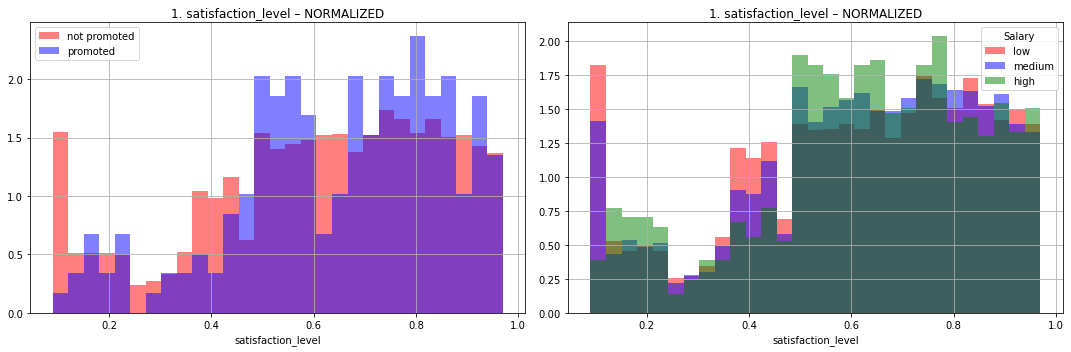

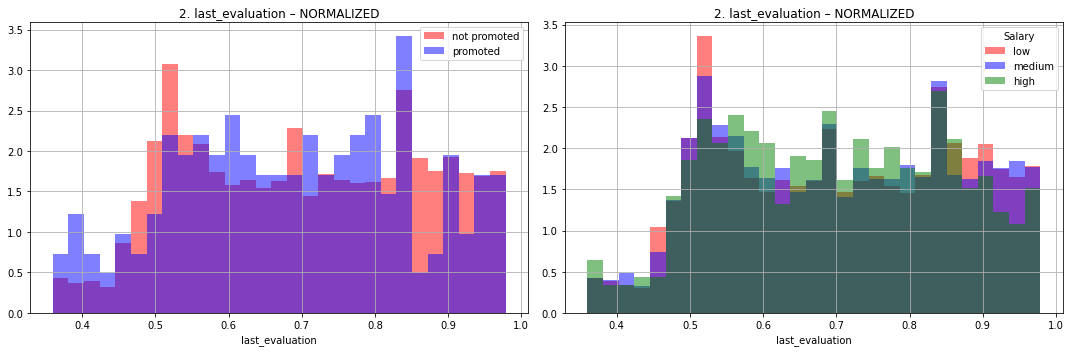

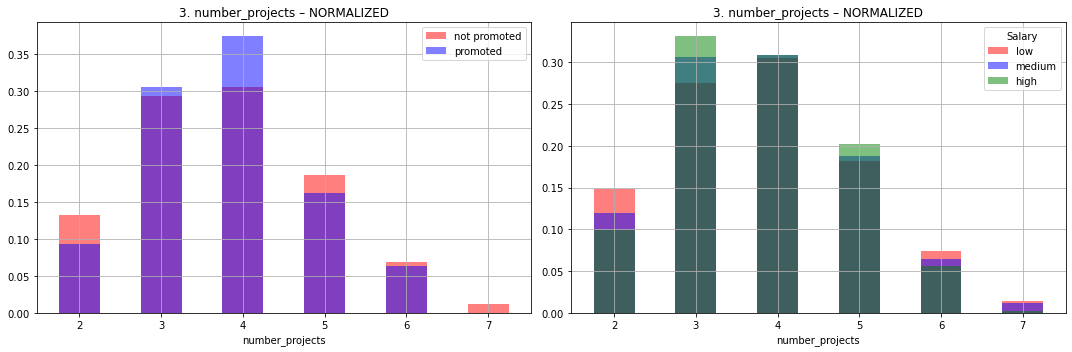

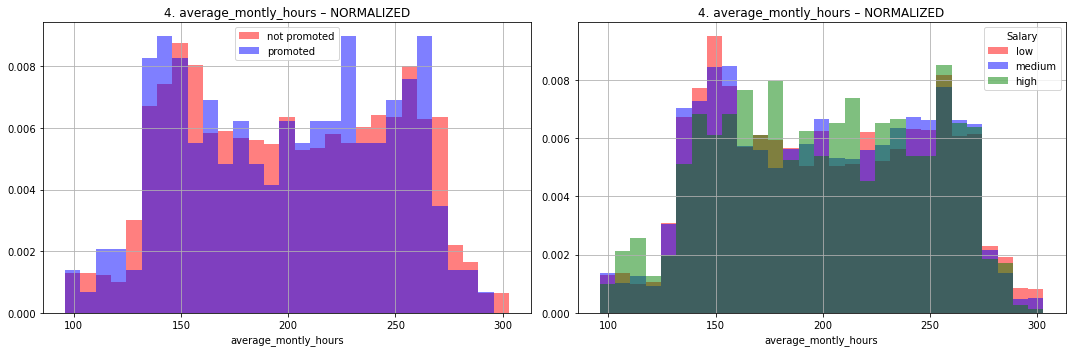

In [336]:
# divide the cases
promoted = data[data.promotion_last_5_years == 1]
not_promoted = data[data.promotion_last_5_years == 0]
salary_low = data[data.salary == "low"]
salary_medium = data[data.salary == "medium"]
salary_high = data[data.salary == "high"]

# list of variables to iterate over
keys_iter = ['satisfaction_level', 'last_evaluation', 'number_projects', 'average_montly_hours']

# bins in the histograms with continuous variables
bins_n = 30

# iteration over the variables
for i, key in enumerate(keys_iter):
    
    #plt.figure(figsize=(12, 6))  # Set the figure size

    if data[key].dtype == 'object' and data[key].nunique() > 4:
        bins = data[key].nunique()
        bin_width = None
        x_label_rotation = 45    

    elif data[key].nunique() > bins_n:
        step = (max(data[key])-min(data[key]))/bins_n
        bins = np.arange(min(data[key]), max(data[key]), step)
        bin_width = 1
        x_label_rotation = None
        
    elif data[key].nunique() <= 3:
        bins = None
        bin_width = None
        x_label_rotation = None
        
    else:
        x_label_rotation = None
        uniques = data[key].unique()
        uniques = np.sort(uniques)
        step = abs(uniques[0] - uniques[1])
        bin_width = step/2
        begin = min(uniques) - bin_width
        end = max(uniques) + 1
        bins = np.arange(begin, end)

    # create a figure
    plt.figure(figsize=(15, 5))
        
    # Histograms
    plt.subplot(1, 2, 1) # create the first subplot
    not_promoted[key].hist(alpha=0.5, label="not promoted", color="Red", 
                   bins=bins, rwidth=bin_width, xrot=x_label_rotation, density=1)
    promoted[key].hist(alpha=0.5, label="promoted", color="Blue", 
                     bins=bins, rwidth=bin_width, xrot=x_label_rotation, density=1)    
    plt.xlabel(key)
    plt.title(str(i+1) + ". " + key + " – NORMALIZED")  # Set the title
    plt.legend()
    
    # Histograms – NORMALIZED
    plt.subplot(1, 2, 2) # create the second subplot
    salary_low[key].hist(alpha=0.5, label="low", color="Red", 
                   bins=bins, rwidth=bin_width, xrot=x_label_rotation, density=1)
    salary_medium[key].hist(alpha=0.5, label="medium", color="Blue", 
                     bins=bins, rwidth=bin_width, xrot=x_label_rotation, density=1) 
    salary_high[key].hist(alpha=0.5, label="high", color="Green", 
                     bins=bins, rwidth=bin_width, xrot=x_label_rotation, density=1)  
    plt.xlabel(key)
    plt.title(str(i+1) + ". " + key + " – NORMALIZED")  # Set the title
    plt.legend(title="Salary")

    plt.tight_layout()  # Adjust the spacing between subplots
    plt.show()  # Display the pair of heatmaps

Seems that there is no correlation between promotions and high salary with a good evaluation, more working hours or projects. **This could be a strong indicator of a non-meritocratic working environment, where high performers may feel pressured to leave.**

Now, let's create cross-tables and heatmaps between all the variables to find possible correlations that we have not found till now.

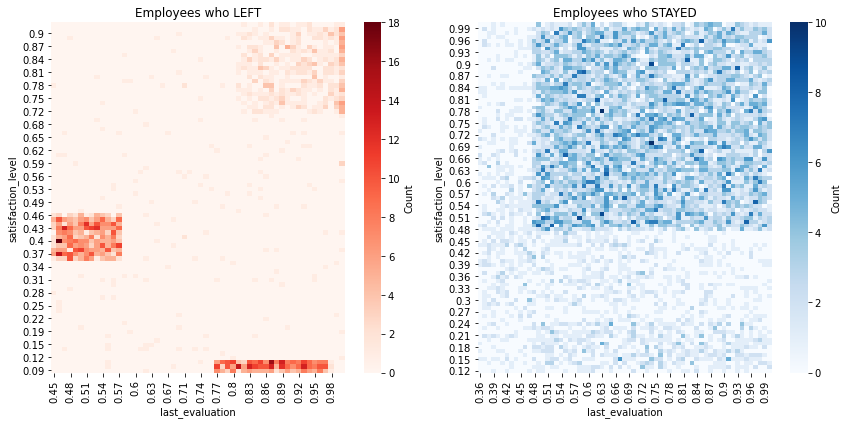

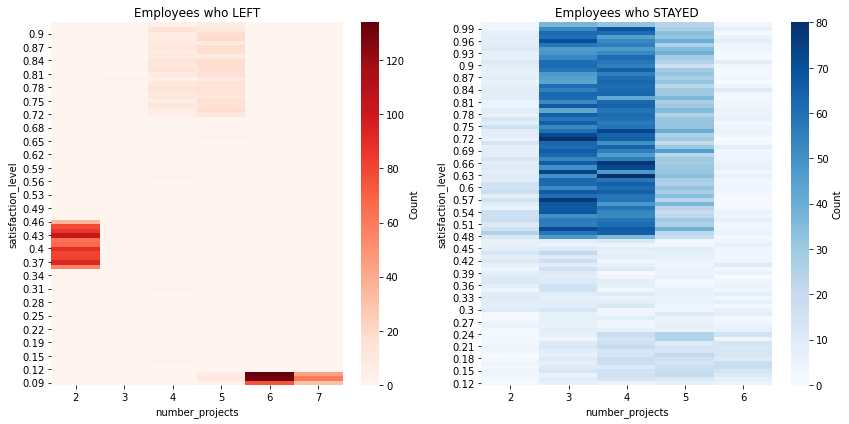

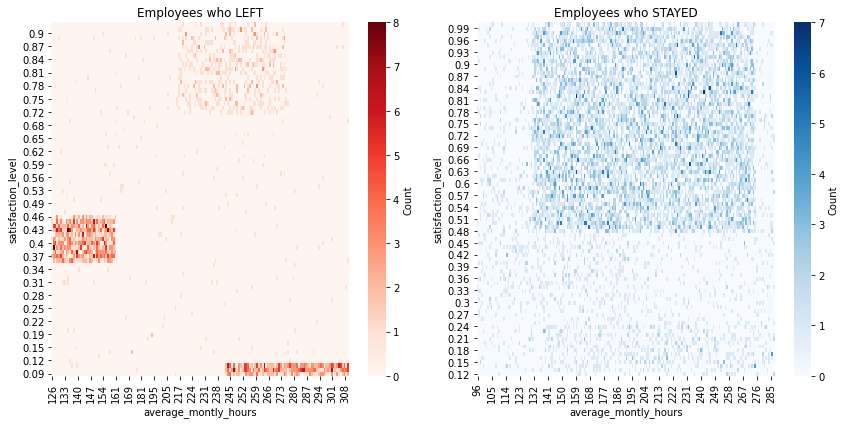

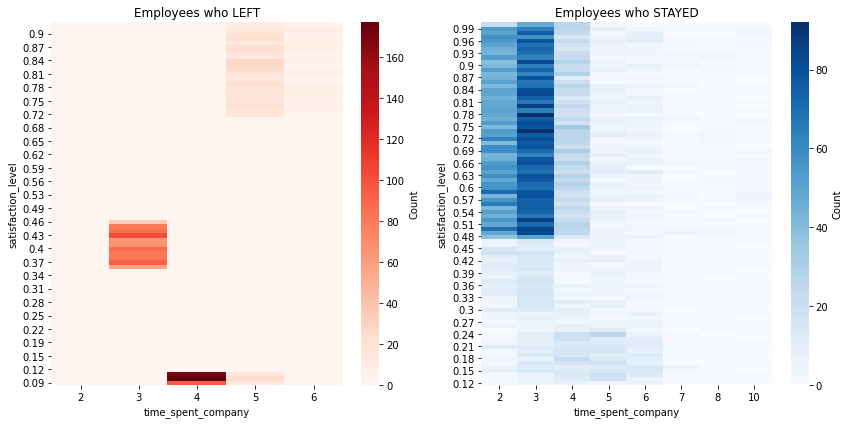

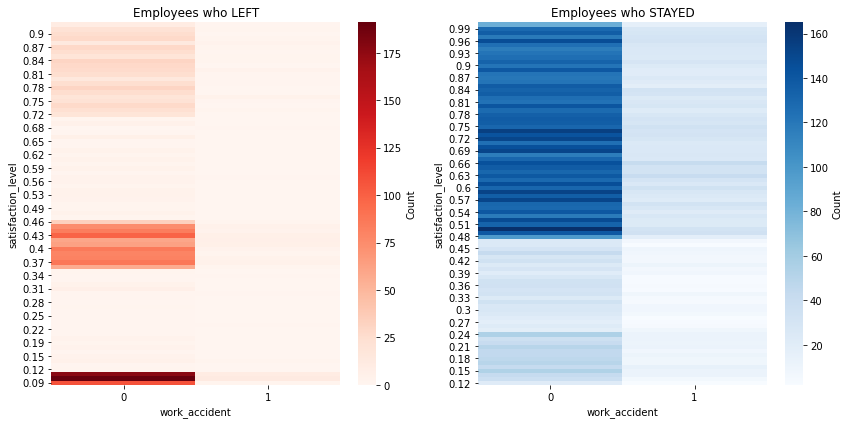

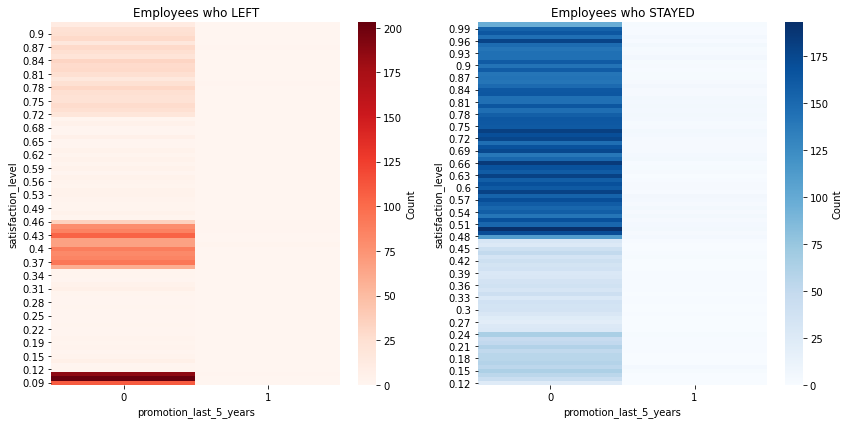

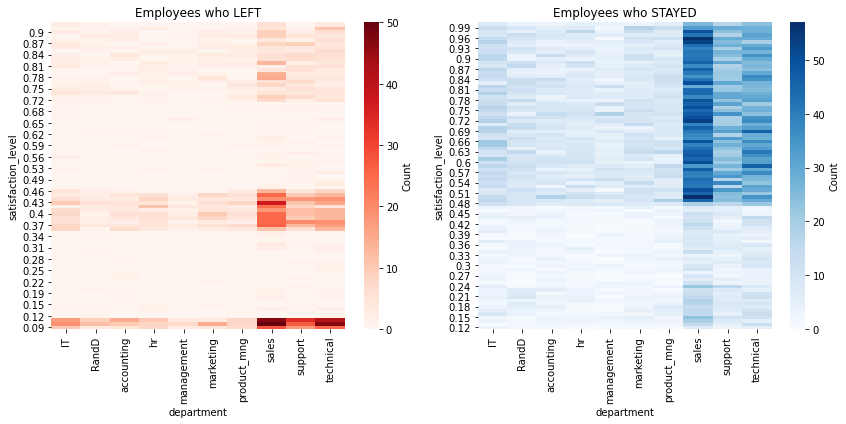

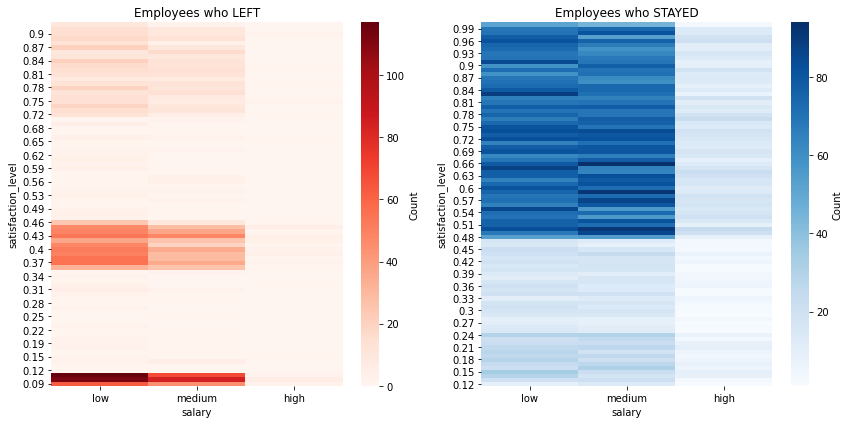

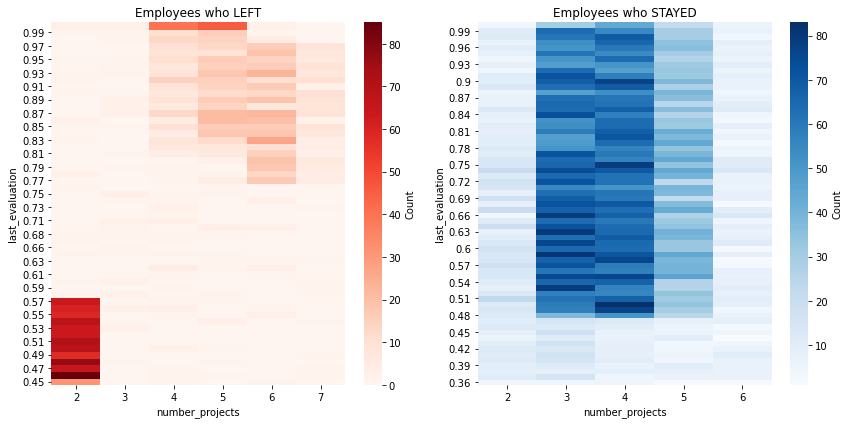

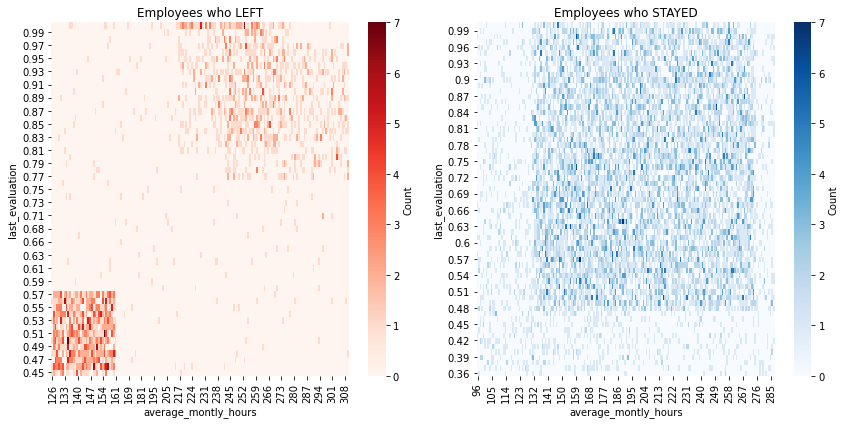

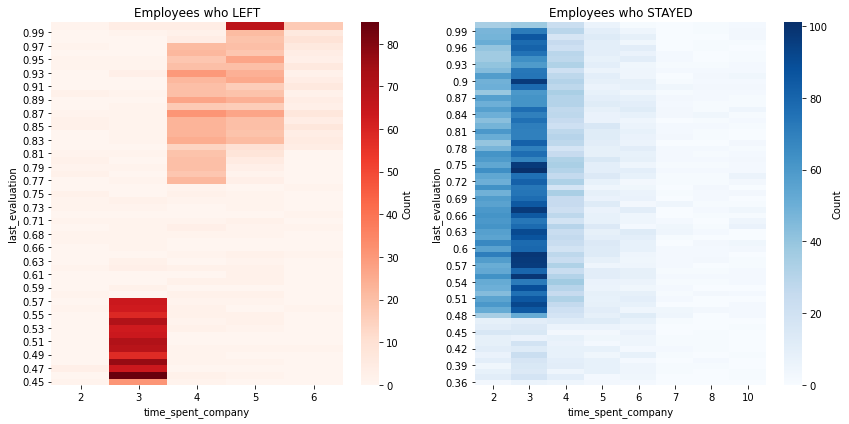

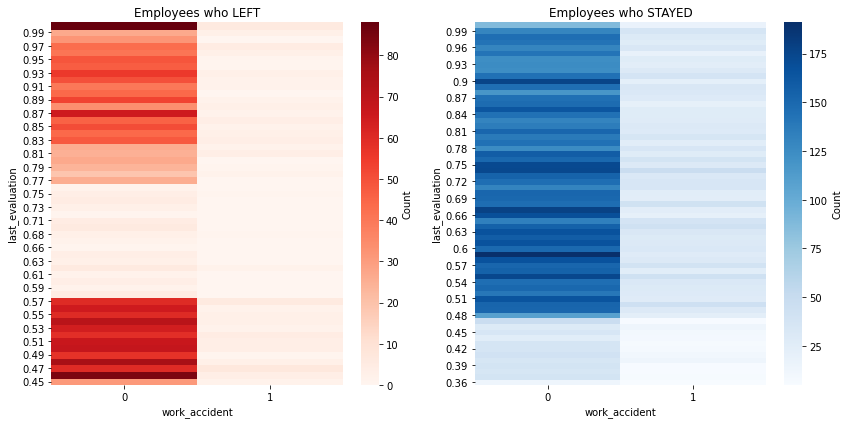

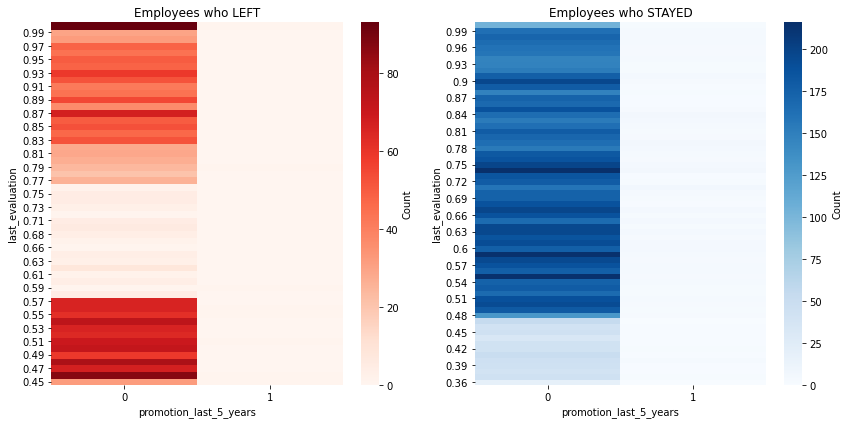

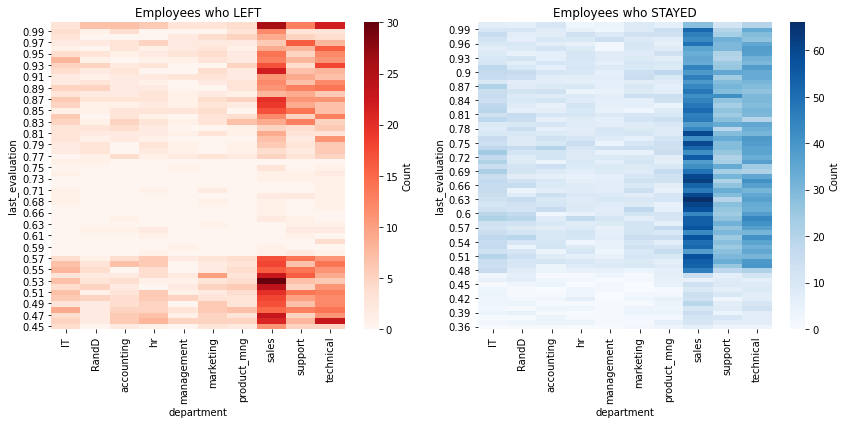

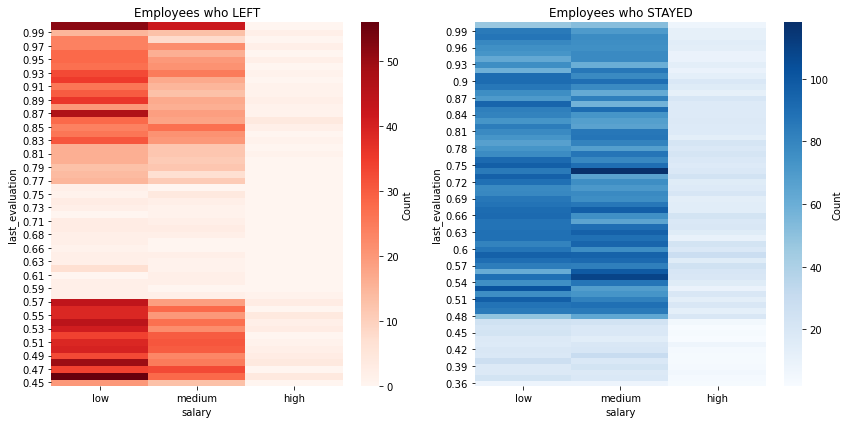

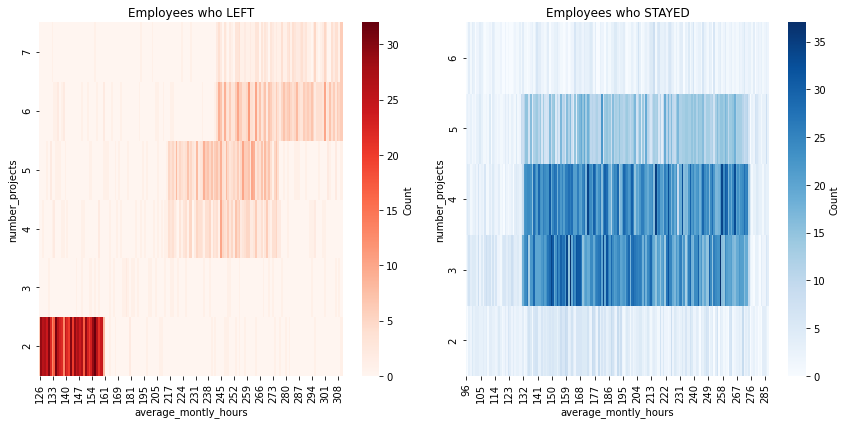

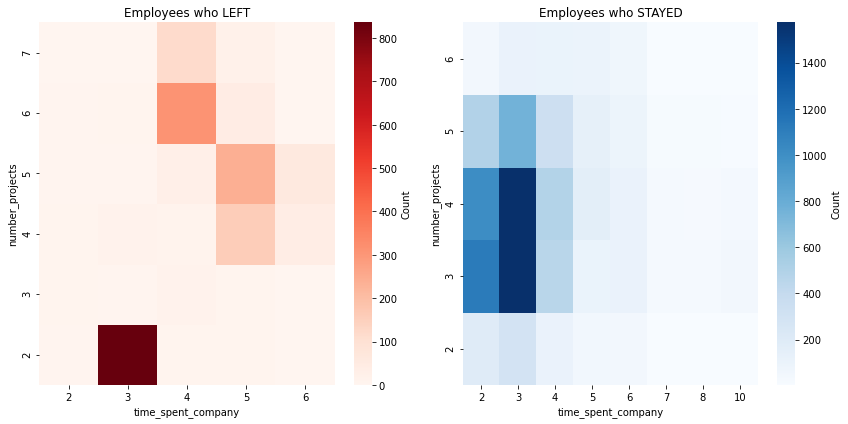

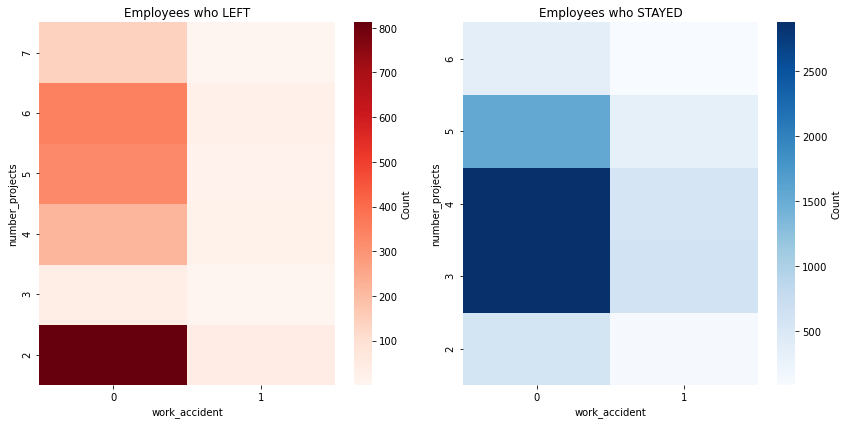

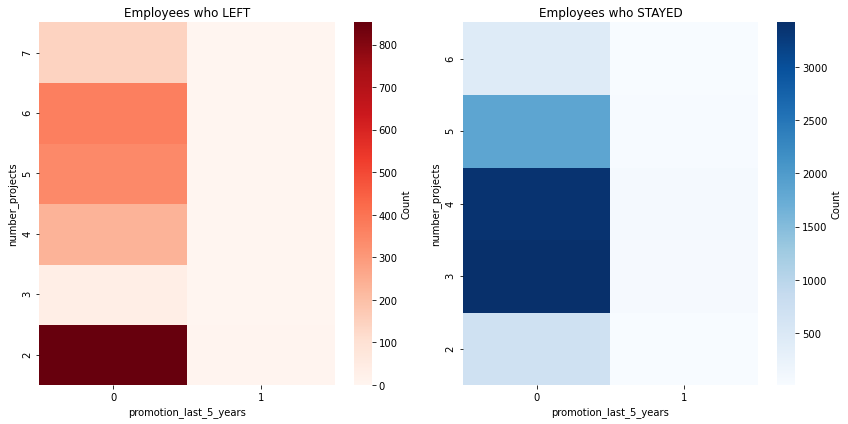

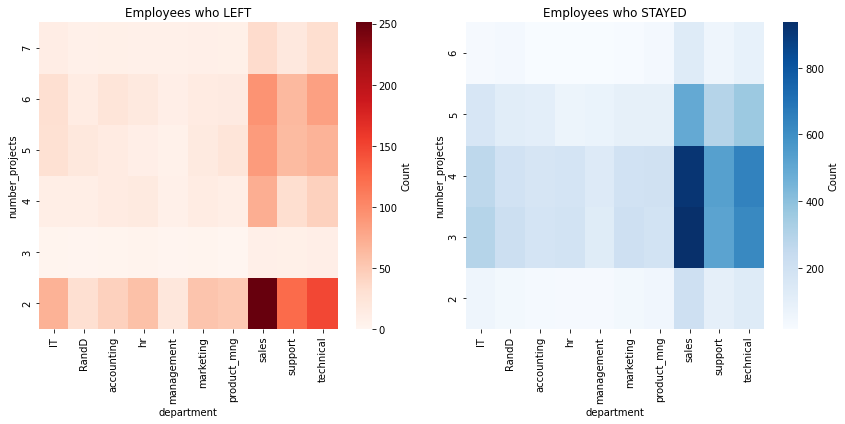

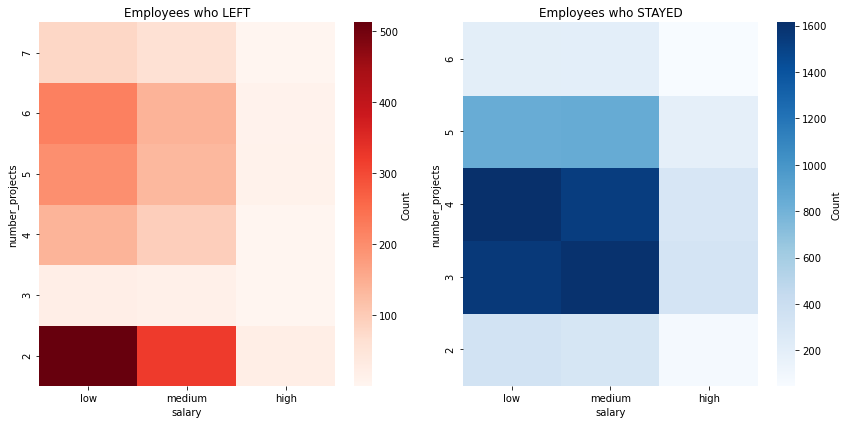

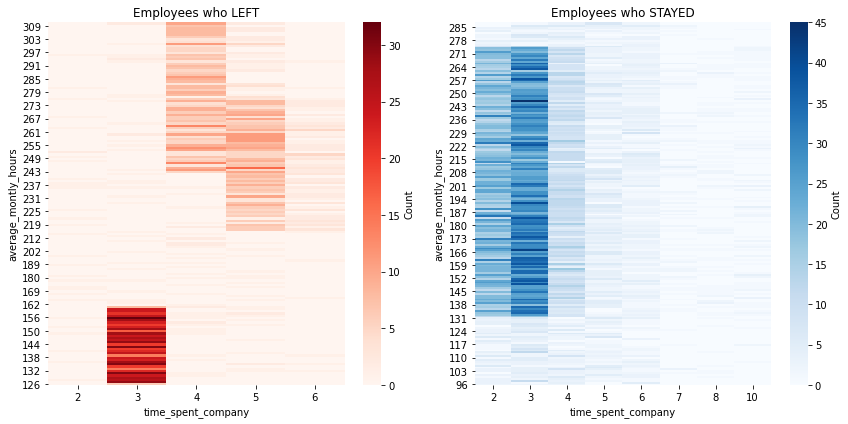

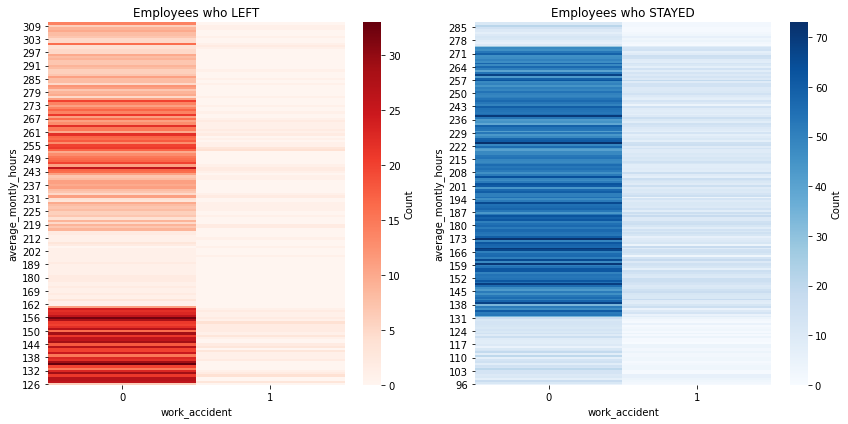

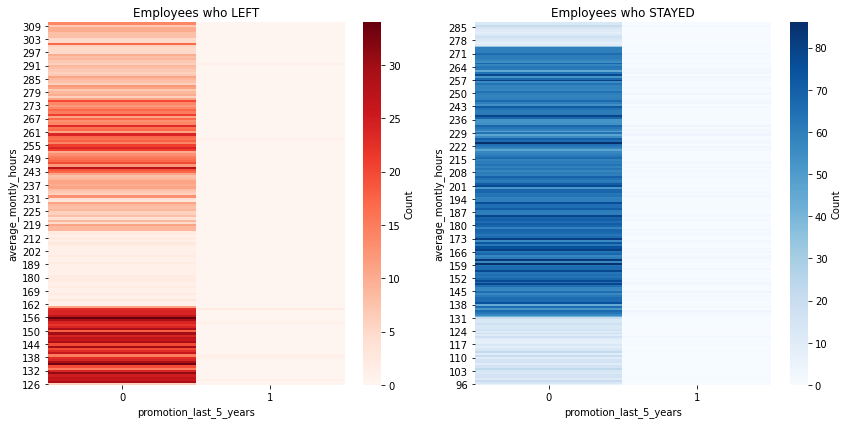

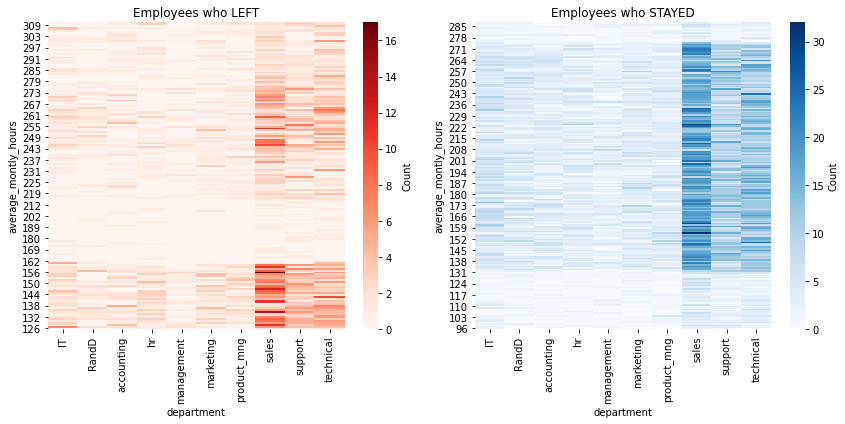

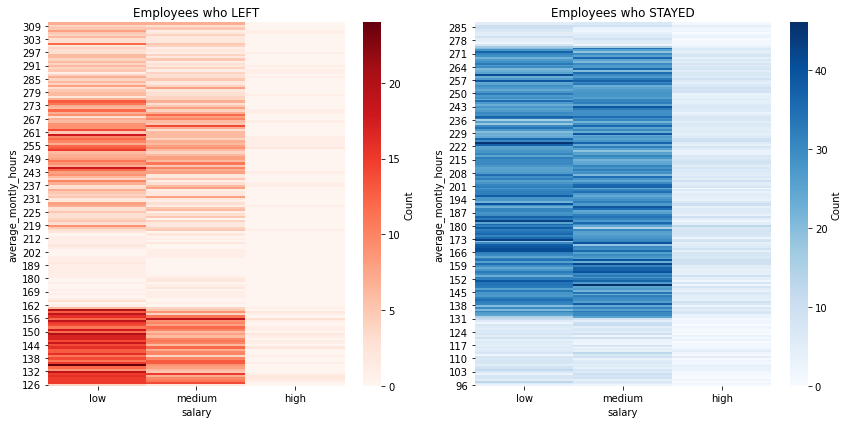

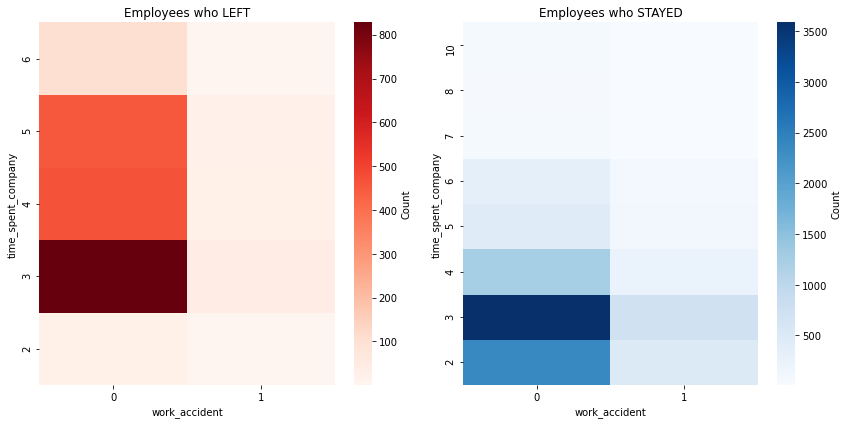

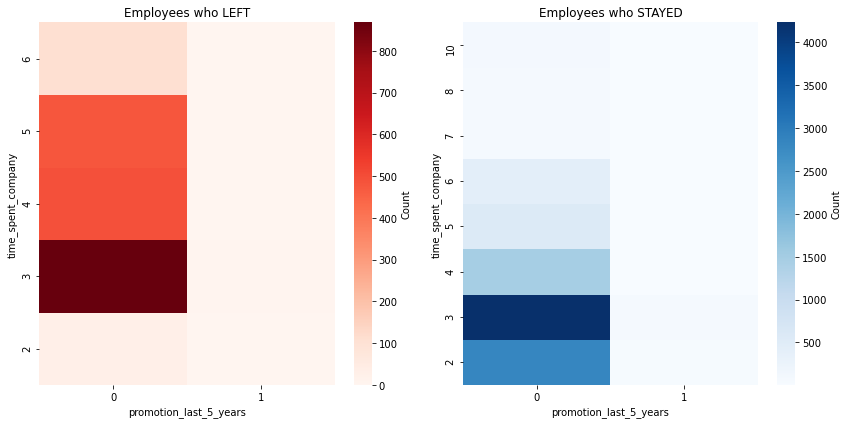

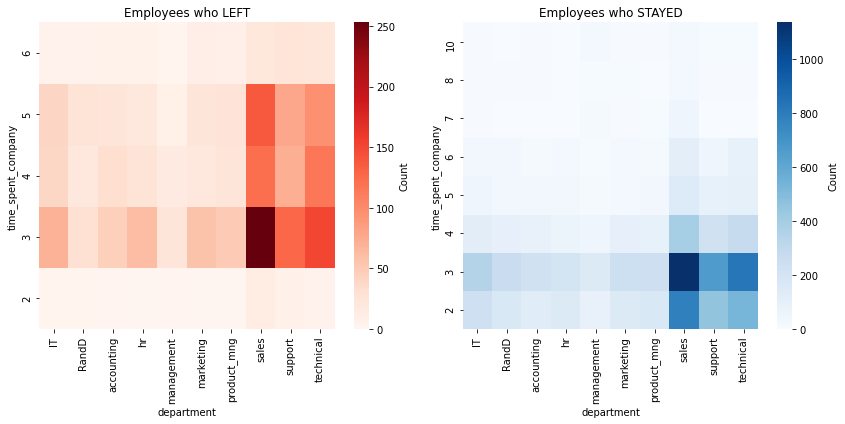

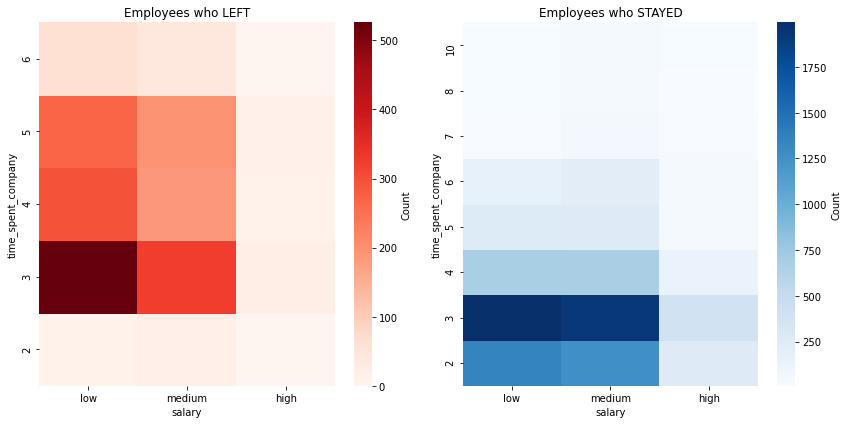

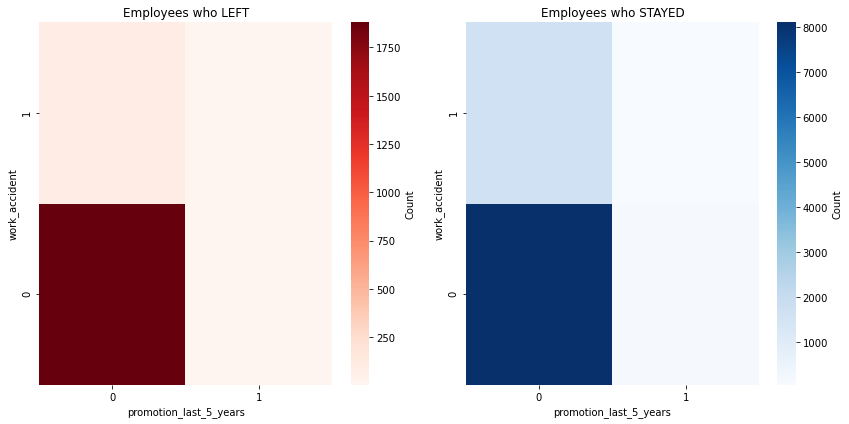

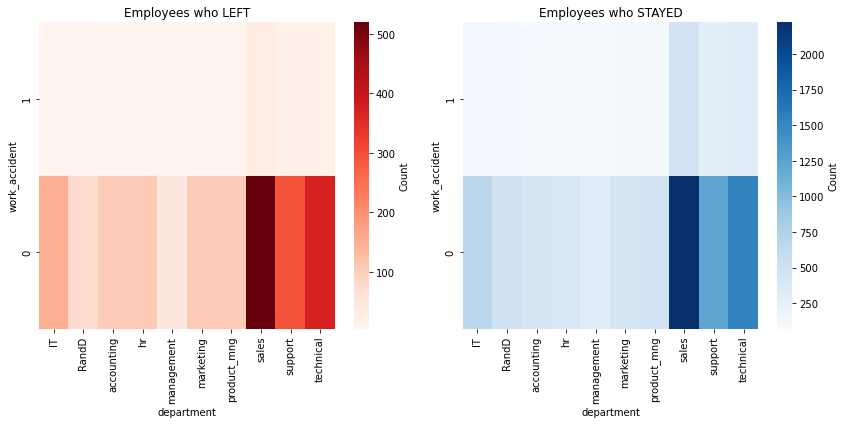

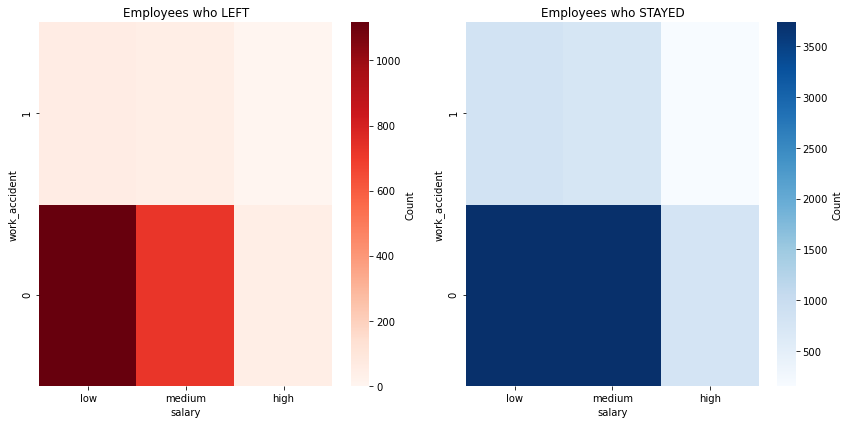

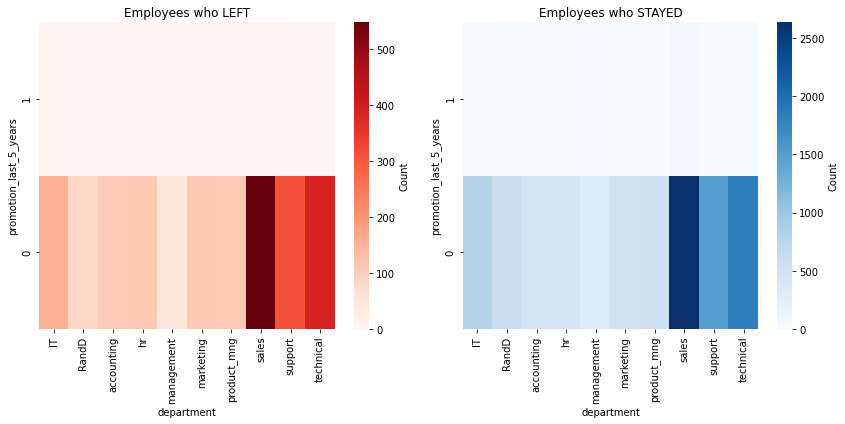

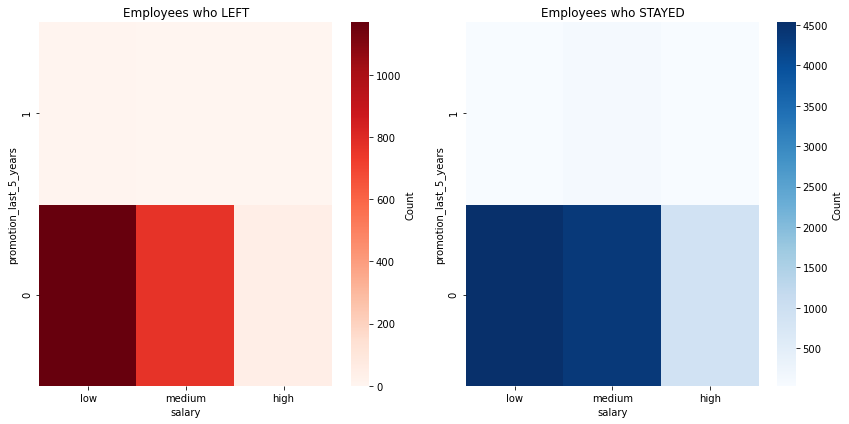

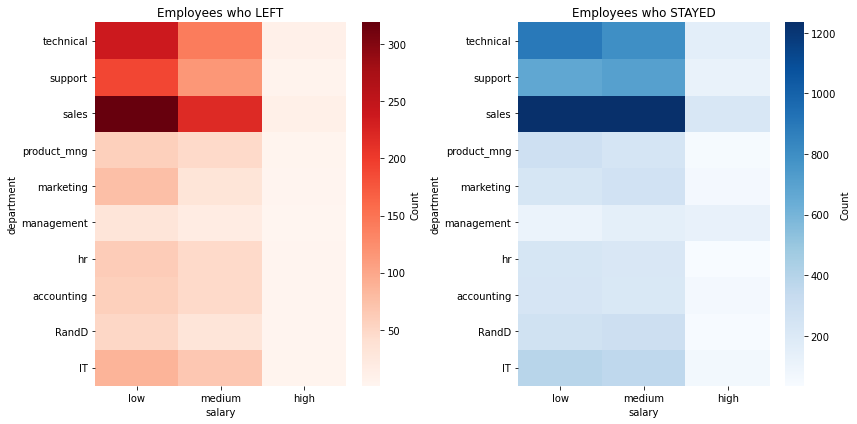

In [337]:
# Create crosstables between variables and visualize them as heatmaps
# so to easily see relationships between two variables


import seaborn as sns

# Class to store all the crosstables in one object
class DataFrameCollection:
    def __init__(self):
        self.dataframes = {}

    def add_data(self, X, Y, Z, dataframe):
        self.dataframes[(X,Y,Z)] = dataframe

    def get_data(self, X, Y, Z):
        return self.dataframes.get((X, Y, Z))
crosstables = DataFrameCollection()

# Divide the data between the groups of employees that stayed vs left,
# so to highlight the differences in behaviour between these two groups
left = data[data.left_yn == 1]
stayed = data[data.left_yn == 0]

# Creates crosstables between all the variables in the dataset
testing = False # developer option for testing the code below, truncates the loop
keys = data.keys().to_list() # creates a list of the variables (column names)
if testing == True: # developer option, truncates the loop
    keys = ["satisfaction_level", "salary", "average_montly_hours"]

# loops over the variables as row of the crosstables
for i, row in enumerate(keys): 
    keys_second = keys[i+1:] # eliminates permutations of variables (rows vs columns)
    
    # loops over the variables as column of the crosstables
    for col in keys_second: 
        
        # eliminates cases where row and column is the same variable
        if row == col: 
            pass
        
        # eliminates the variable "left_yn"
        elif (row == "left_yn") or (col == "left_yn"): 
            pass
        
        # main loop
        else: 
            
            """ Create crosstables """
            
            # crostable for employees who left
            left_data = pd.crosstab(left[row], left[col]) 
            left_data = left_data.fillna(0) # fill NaNs
            
            # crosstables for employees who stayed
            stayed_data = pd.crosstab(stayed[row], stayed[col])
            stayed_data = stayed_data.fillna(0) # fill NaNs
            
            # Reorder the "salary" variable from low to high
            if col == "salary":
                column_order = ['low', 'medium', 'high']
                left_data = left_data.reindex(columns=column_order)
                stayed_data = stayed_data.reindex(columns=column_order)
            if row == "salary":
                row_order = ['low', 'medium', 'high']
                left_data = left_data.reindex(index=row_order)
                stayed_data = stayed_data.reindex(index=row_order)
            #print(stayed_data.keys())
            
            # Add the crosstables to the "crosstables" storing object
            crosstables.add_data(1,row,col,left_data)
            crosstables.add_data(0,row,col,stayed_data)
            
            
            """ Plot the crosstables as heatmaps """
            # heatmaps of the two groups (left and stayed) are plot next to each other
            
            plt.figure(figsize=(12, 6))  # Set the figure size

            # Subplot 1: Left heatmap
            plt.subplot(1, 2, 1)  # Create a subplot
            ax1 = sns.heatmap(left_data, cmap="Reds", cbar_kws={'label': 'Count'})  # Create the heatmap
            ax1.invert_yaxis()  # Flip the y-axis
            plt.title("Employees who LEFT")  # Set the title

            # Subplot 2: Right heatmap
            plt.subplot(1, 2, 2)  # Create a subplot
            ax2 = sns.heatmap(stayed_data, cmap="Blues", cbar_kws={'label': 'Count'})  # Create the heatmap
            ax2.invert_yaxis()  # Flip the y-axis
            plt.title("Employees who STAYED")  # Set the title

            plt.tight_layout()  # Adjust the spacing between subplots

            plt.show()  # Display the pair of heatmaps
            

# Insight
From the previous analysis, it seems that the employees who LEFT can be divided in 3 groups:
- **Unhappy Overachievers (UO)**: very low satisfaction, high project number and working hours. 
    These are high achievers that were not happy, probably because they were not recognized and/or appreciated.
    We definitely want to keep these employees. 
- **Unhappy Underachievers (UU)**: low satisfaction, low project number and working hours
    They are probably employees who got fired, were quitely quitting or looking already for a new job.
    We may not be interested in keeping these employees. 
- **Happy Overachievers (HO)**: high satisfaction, high project number and working hours.
    We want to keep these employees, but they may have left simply because they received a better offer.

From a previous histogram analysis, we have also seen that there is no correlation between the promotion and salary level with the number of projects, montly hours and evaluation. This is a strong indication of a non-meritocratic working environment, which would explain the Unhappy Overachiever group.

Now, let's focus on the Unhappy Overachievers who LEFT and analyze their behavior, we may find indications on how to keep them. 

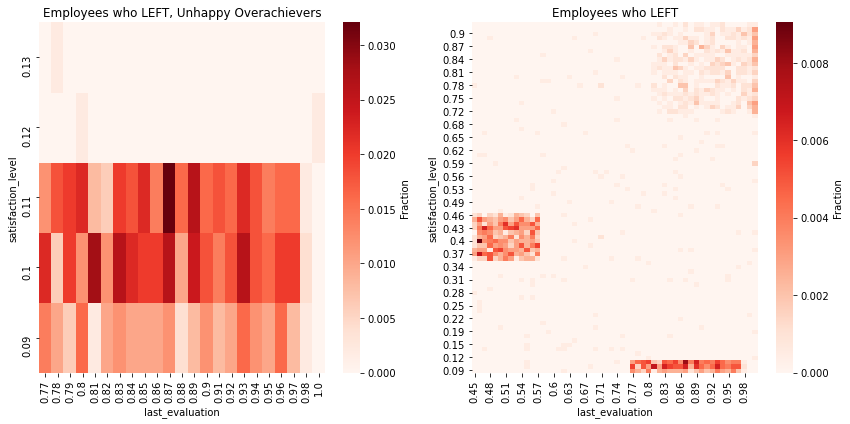

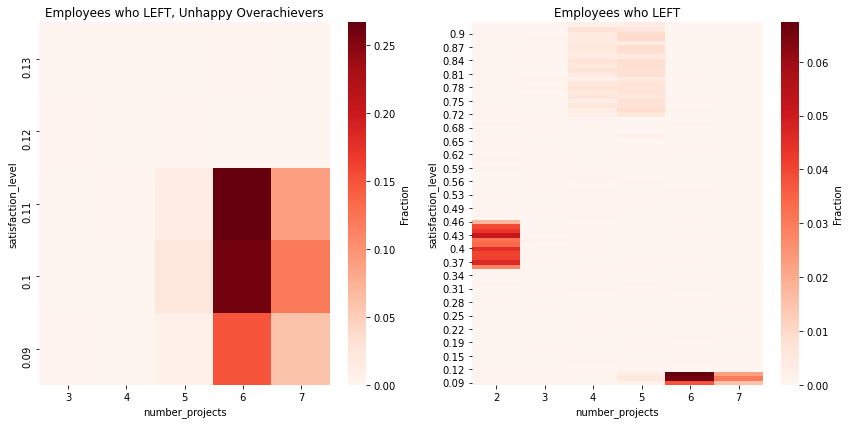

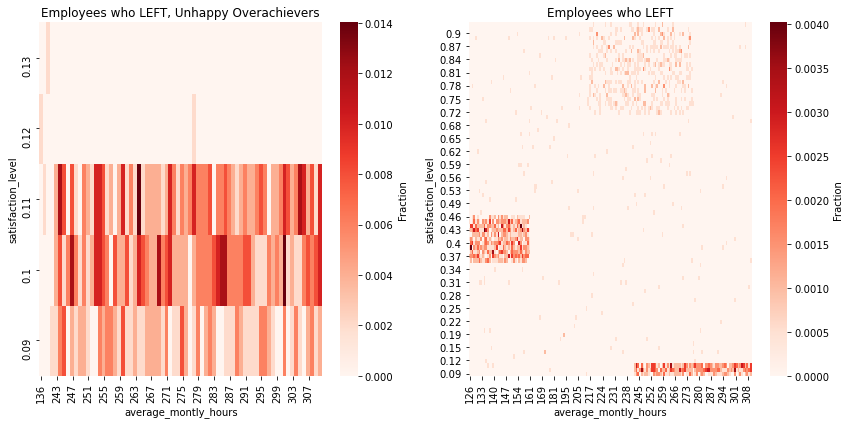

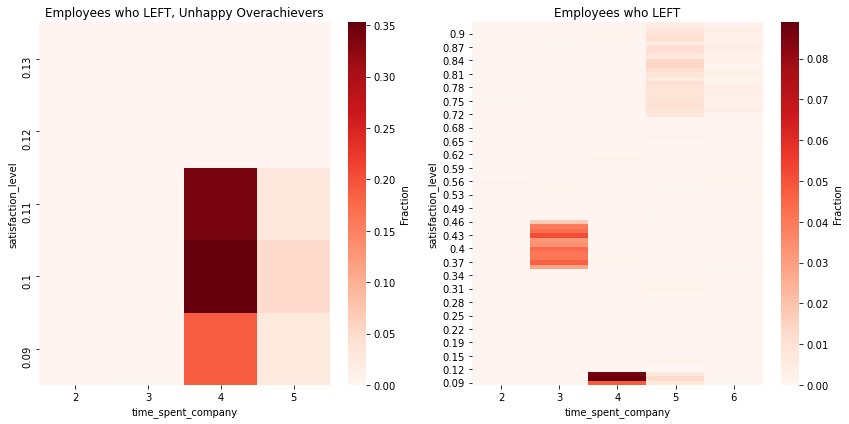

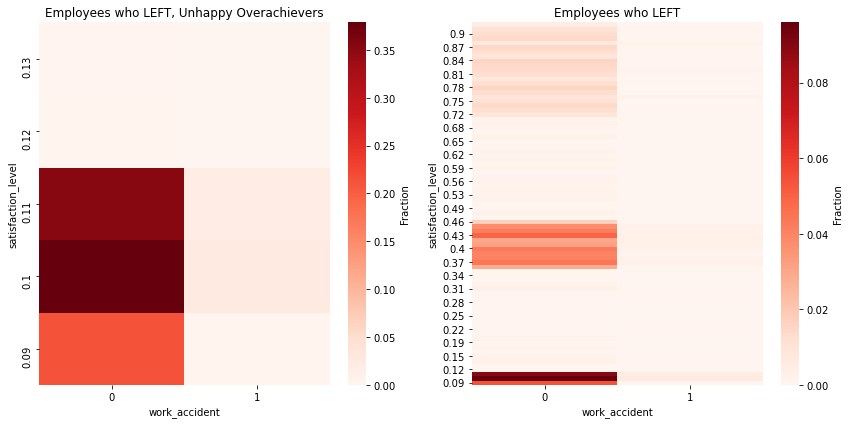

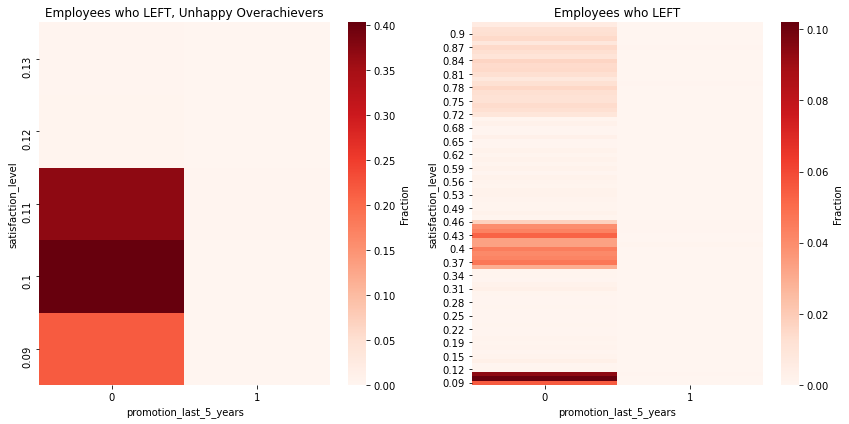

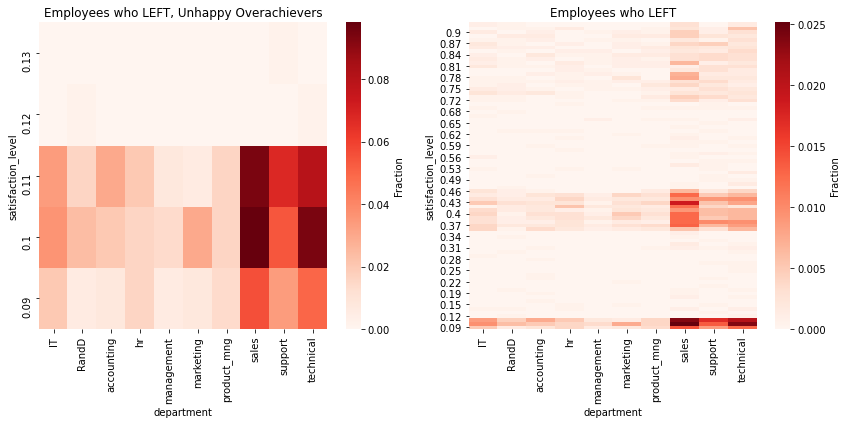

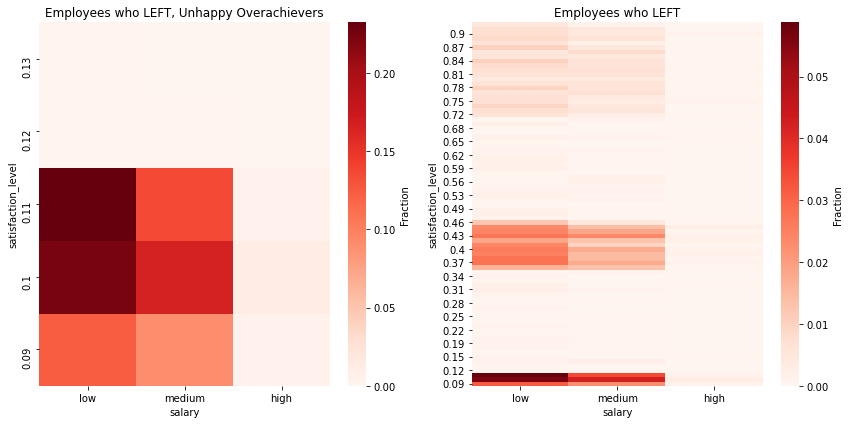

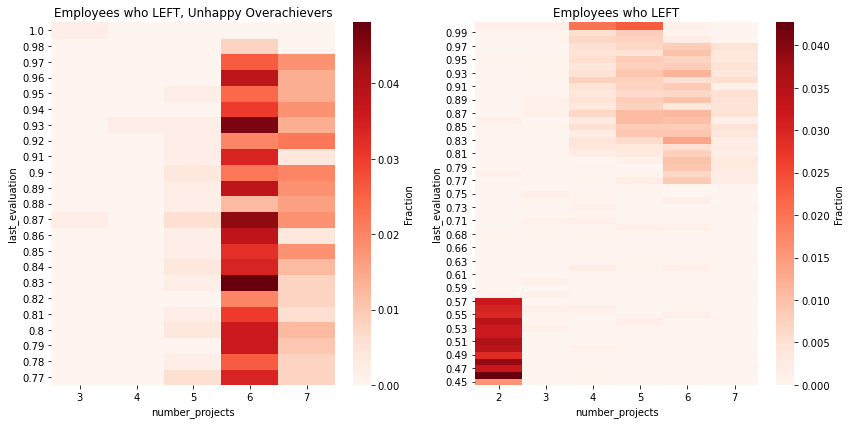

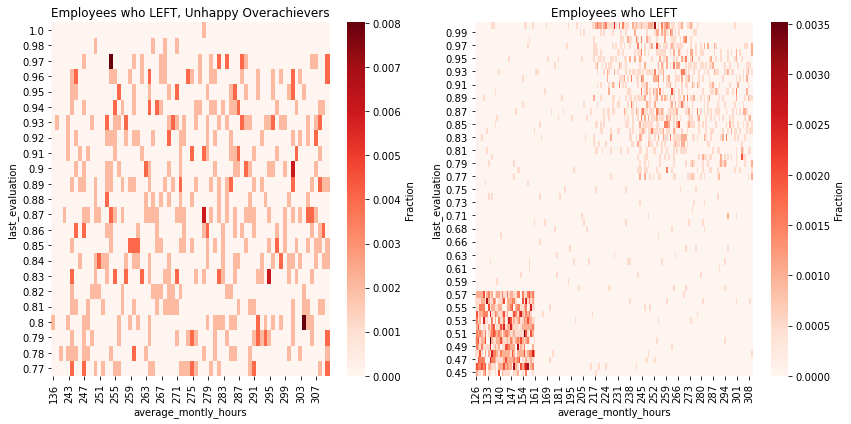

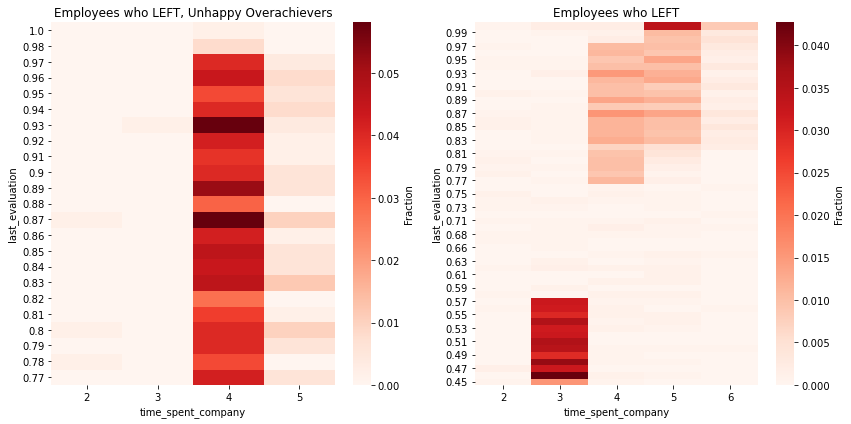

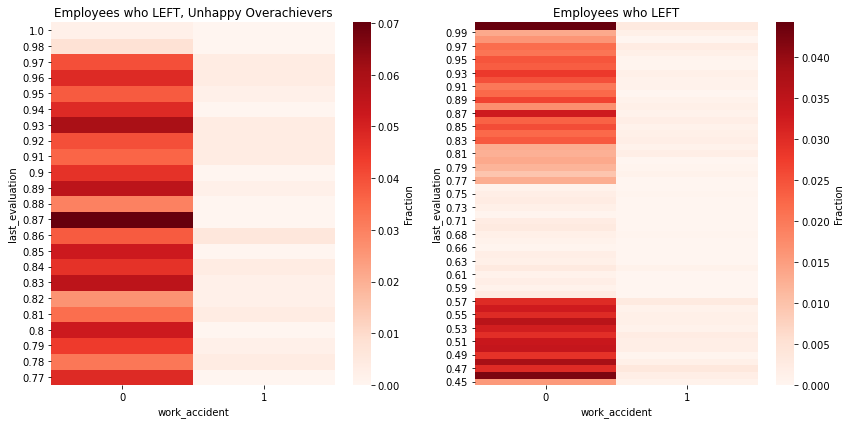

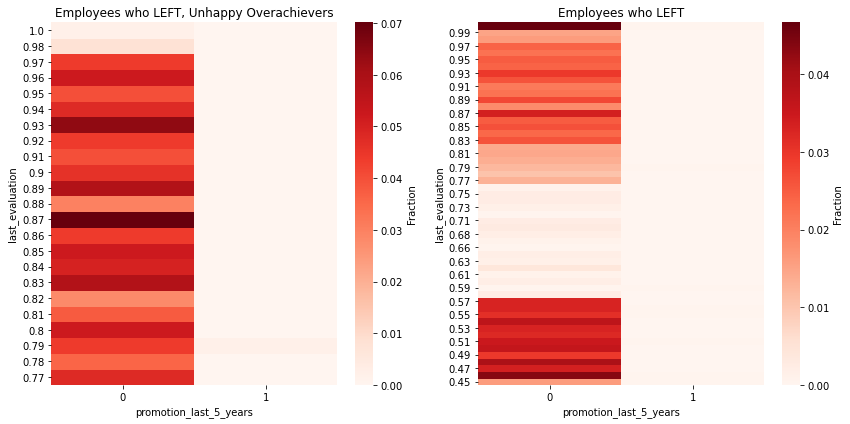

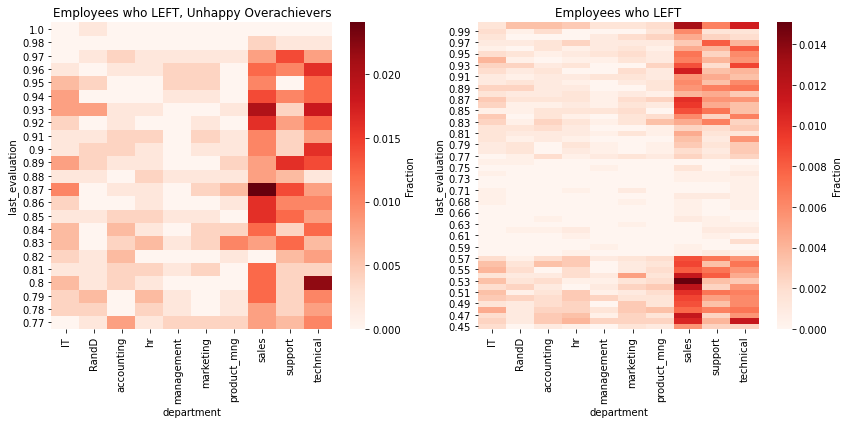

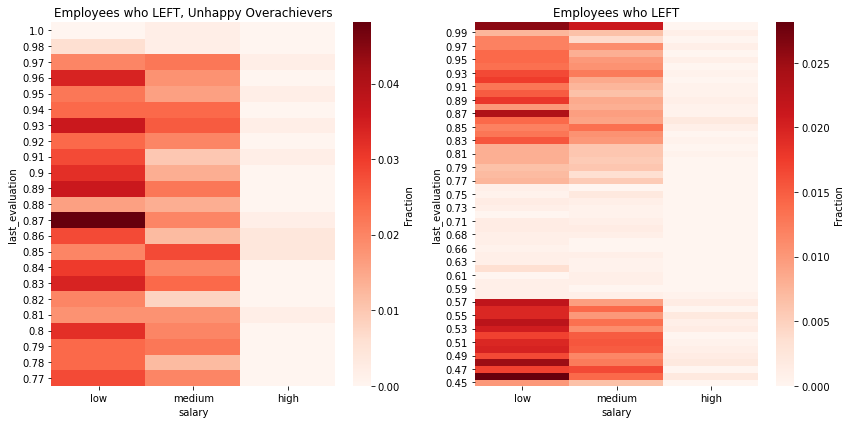

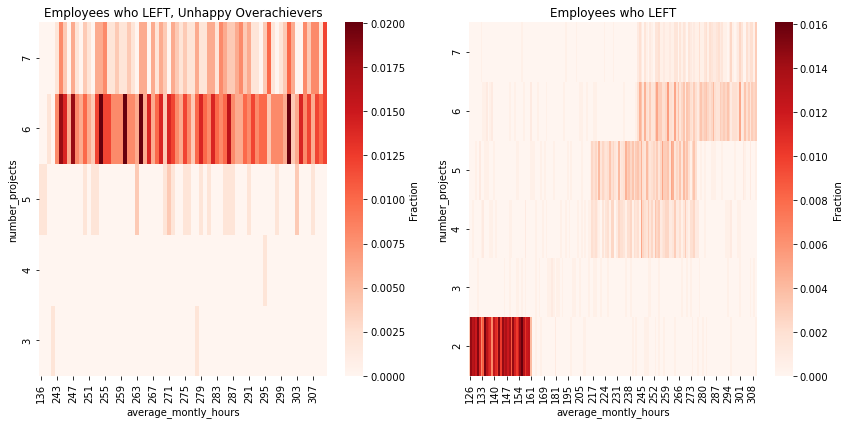

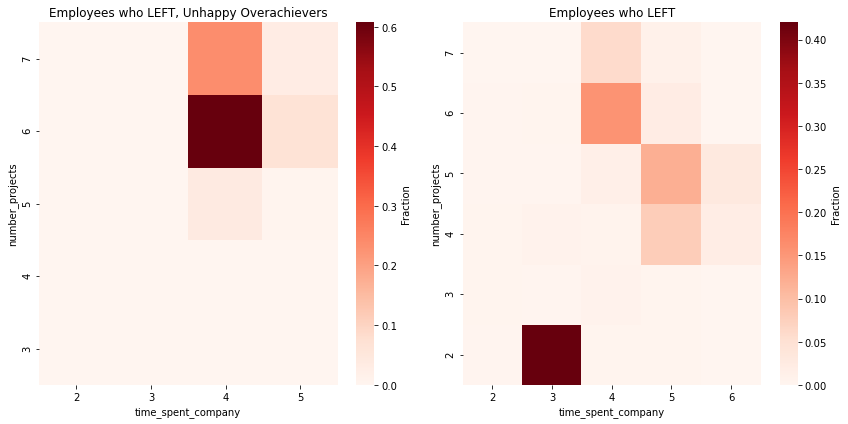

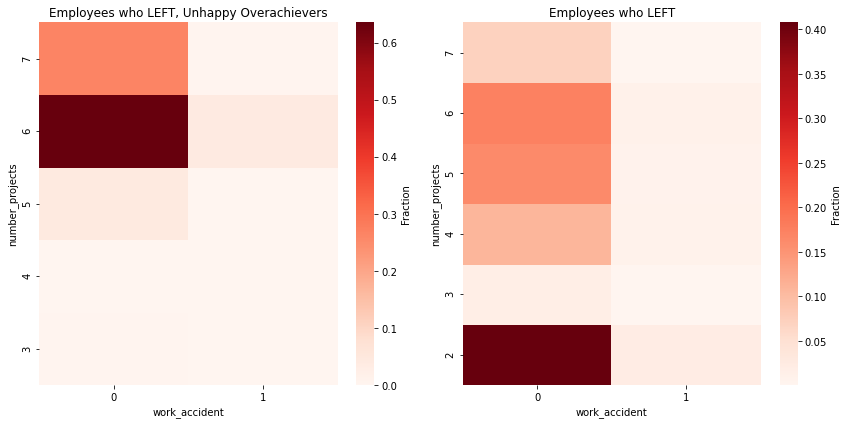

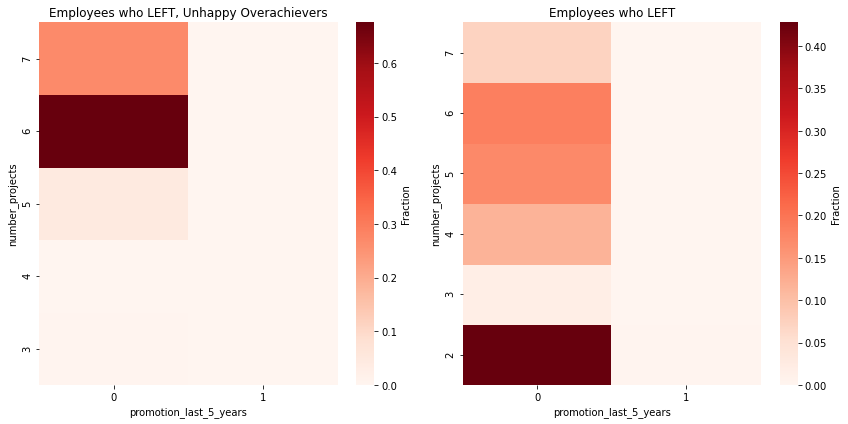

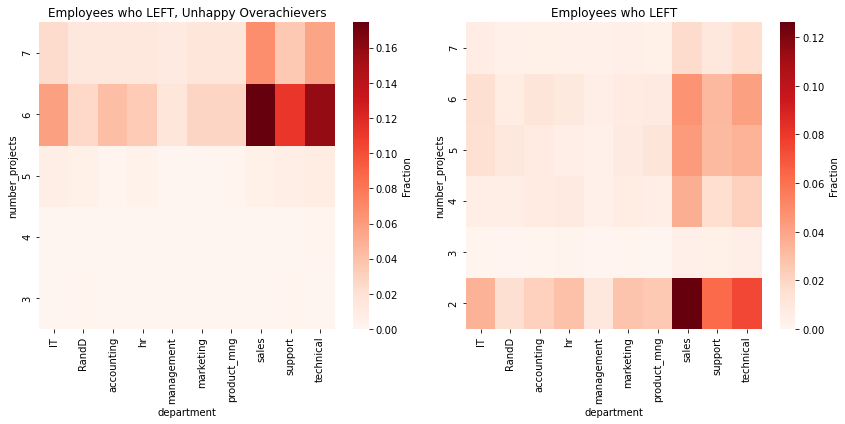

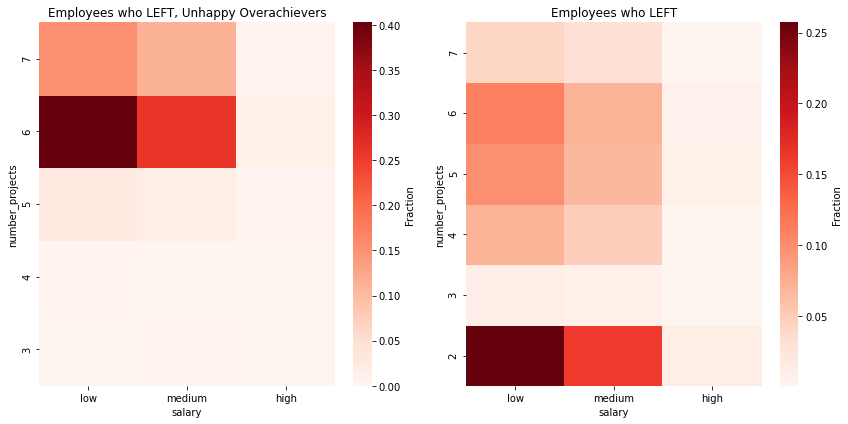

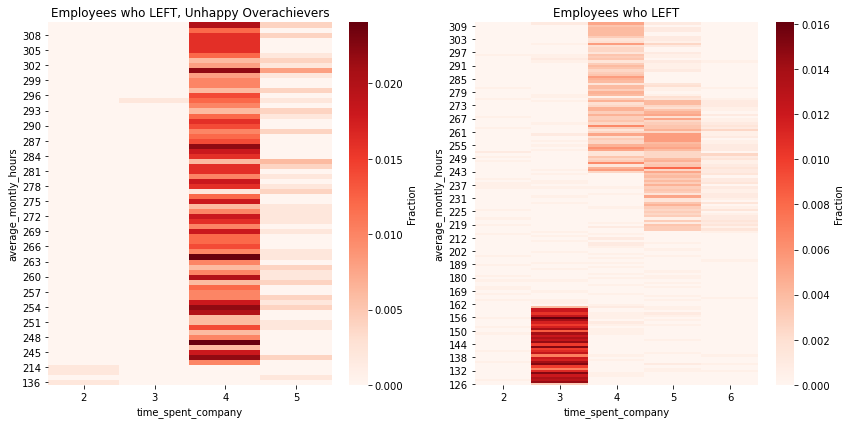

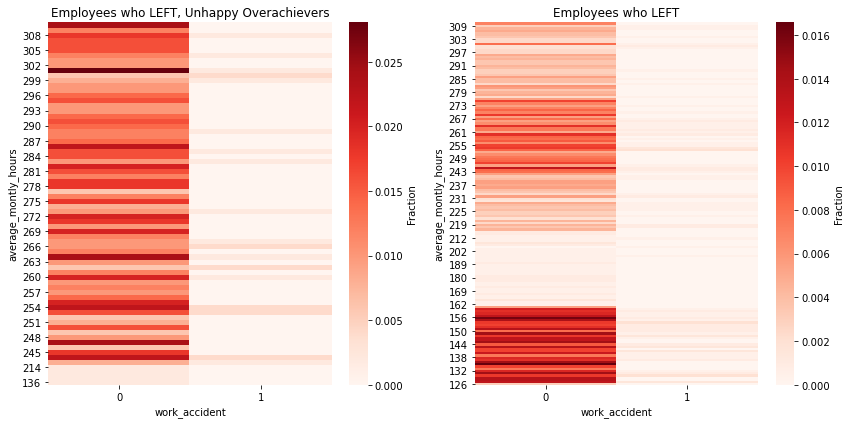

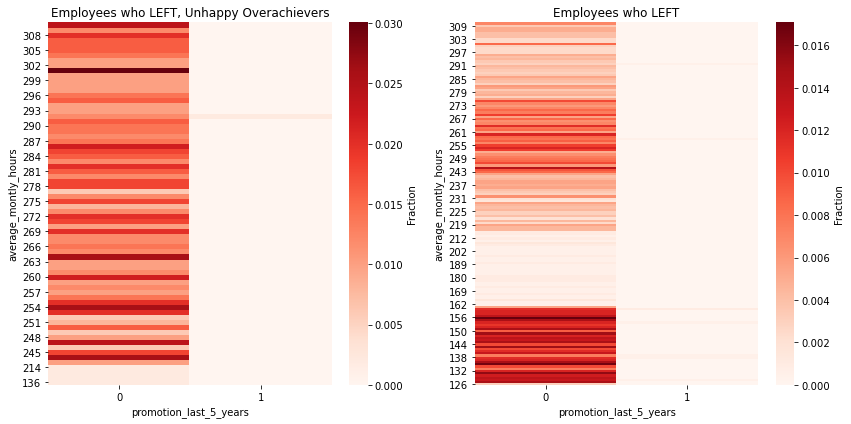

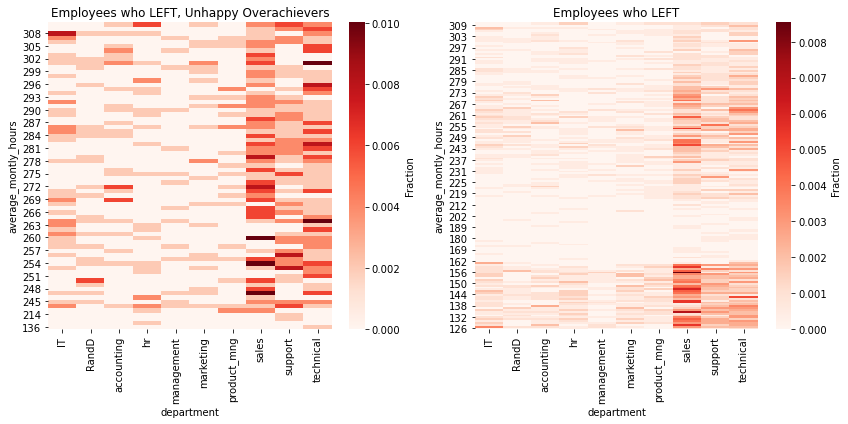

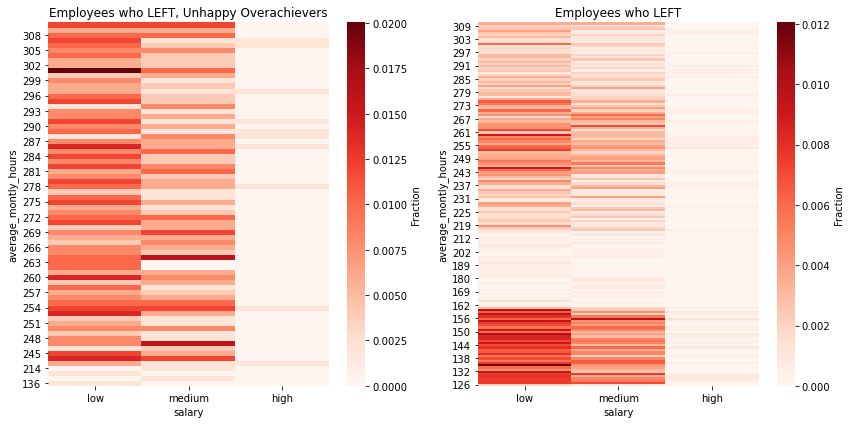

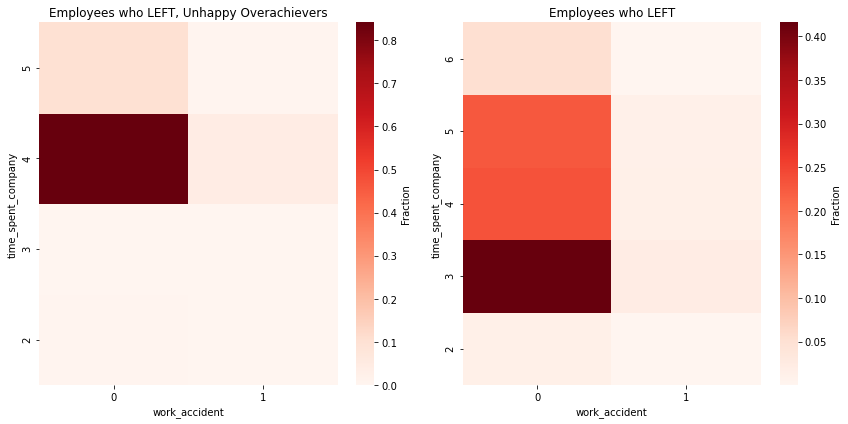

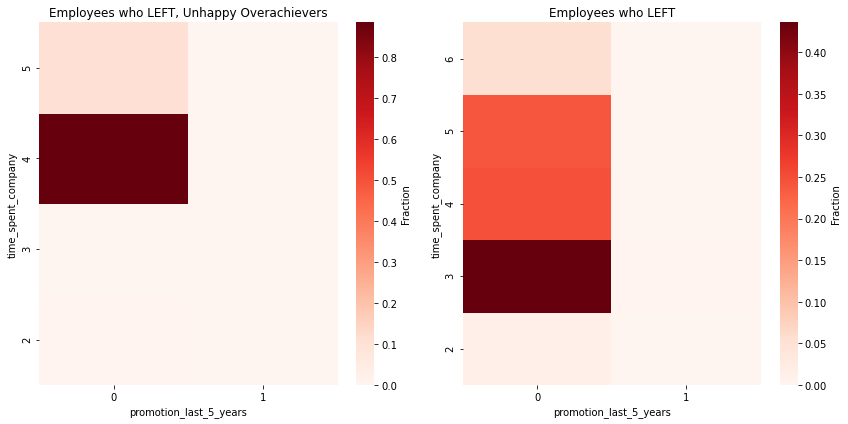

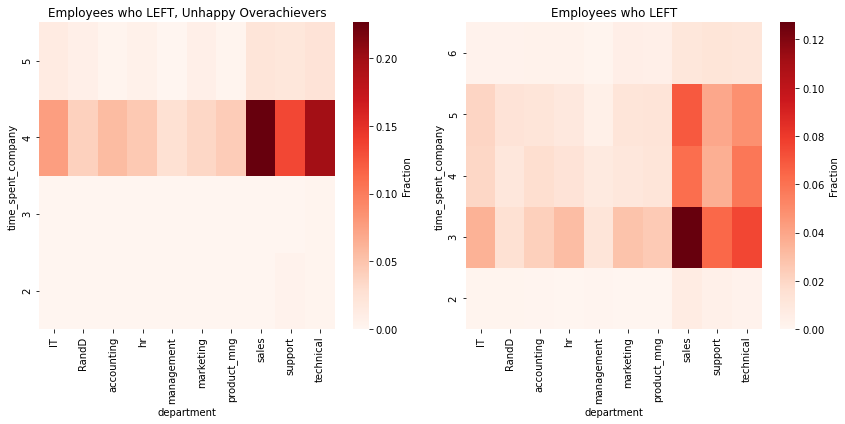

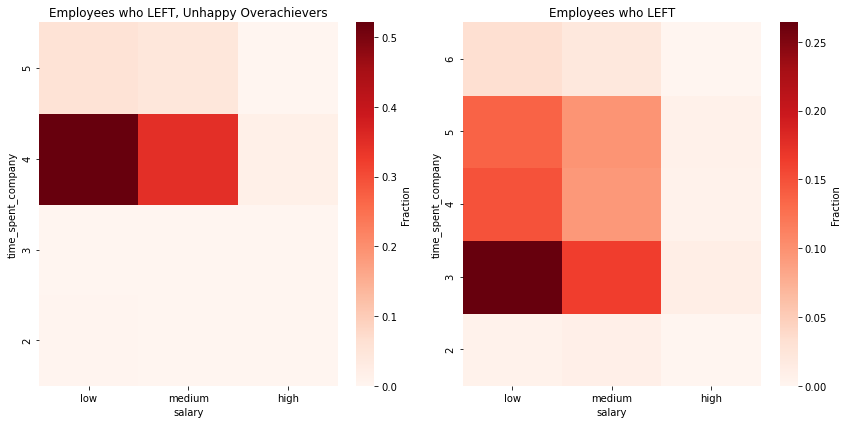

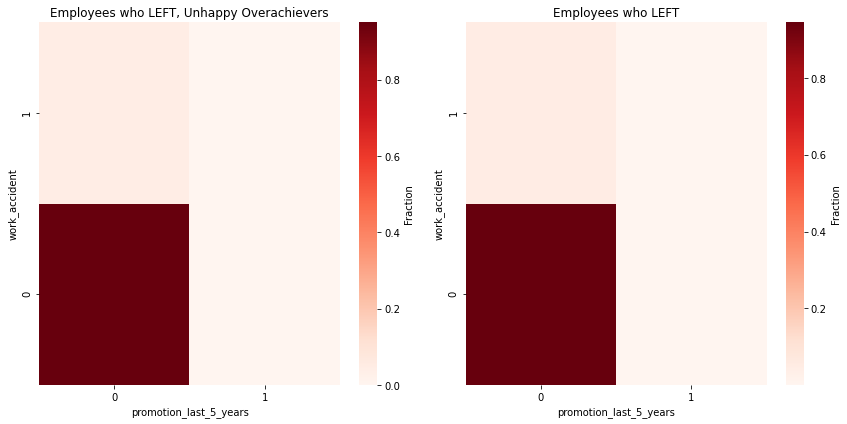

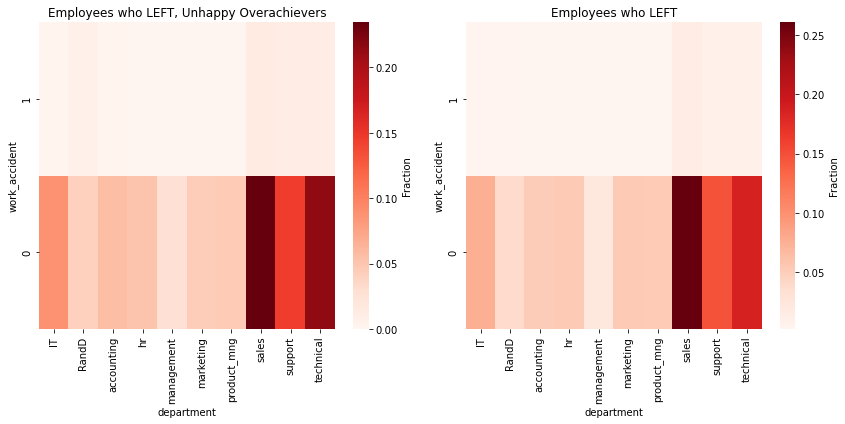

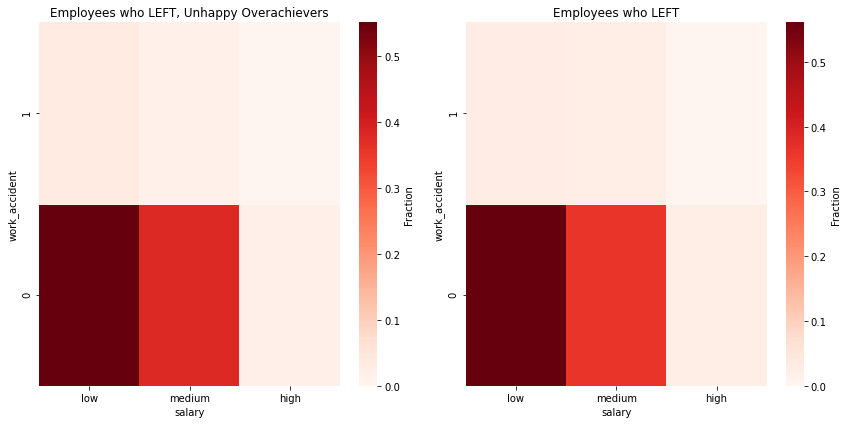

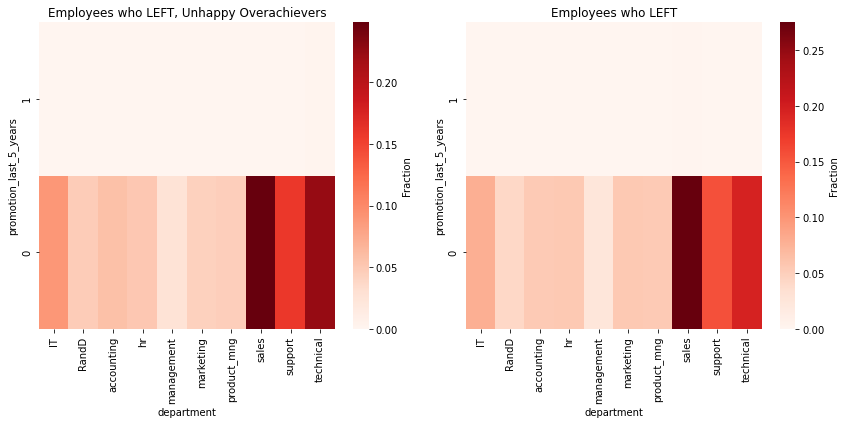

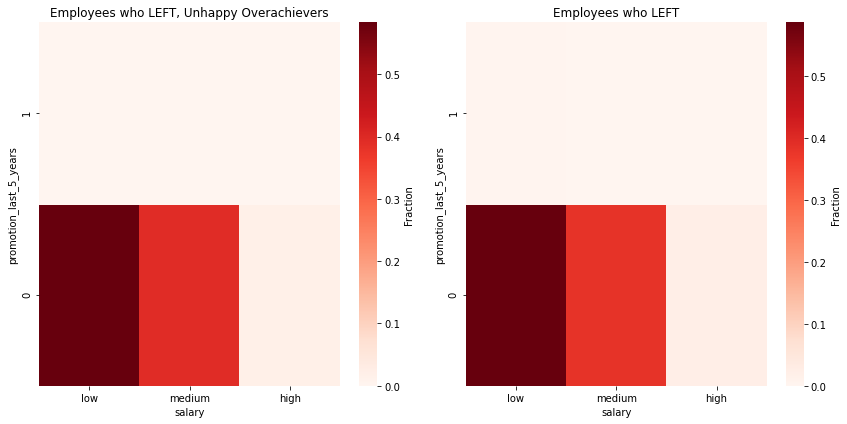

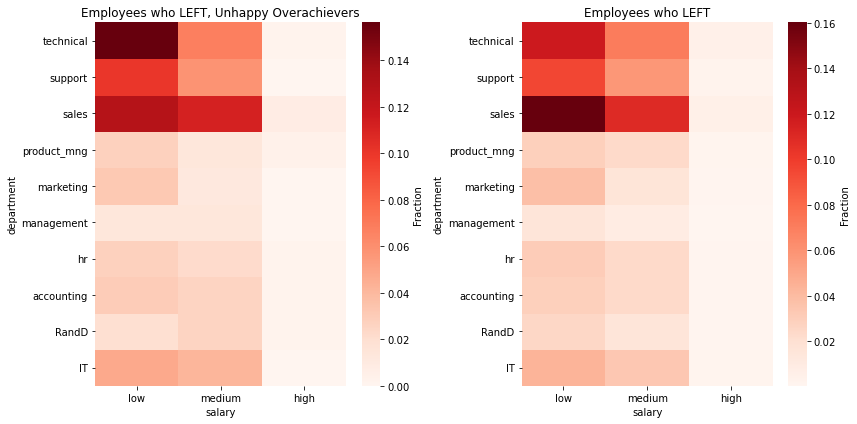

In [341]:
# Focusing just on the Unhappy Overachievers who LEFT
# and analyzing their behavior vs the other two groups (UU and HO)
# the crosstables below are NORMALIZED

# Divide the data between employees who LEFT or STAYED
left = data[data.left_yn == 1] # data of the employees who LEFT
stayed = data[data.left_yn == 0] # data of the employees who STAYED

# Boolean mask for selecting the Underestimated Overachievers
crop_mask = (left["last_evaluation"] > 0.75) & (left["satisfaction_level"] < 0.15)

# Dataframe for the Underestimated Overachievers
crop = left[crop_mask] 

# Developer option, truncates the loop below
testing = False
keys = data.keys().to_list()
if testing == True:
    keys = ["satisfaction_level", "salary", "average_montly_hours"]

# Loop the variables and creates all the possible crosstabless for the data
for i, row in enumerate(keys): # loop the variables over the rows
    keys_second = keys[i+1:] # eliminates permutations of vabiables (columns vs rows)
    
    for col in keys_second: # loop the variables over the columns
        
        # eliminates the crossbables between two identical variables
        if row == col:
            pass
        
        # eliminates the "left_yn" varialbe
        elif (row == "left_yn") or (col == "left_yn"):
            pass
        
        # main loop
        else:
            
            # creates the crosstable for the Unhappy Overachievers
            crop_data = pd.crosstab(crop[row], crop[col], normalize="all")
            crop_data = crop_data.fillna(0) # fill nans
            
            # creates the crosstable for all the employees who left
            left_data = pd.crosstab(left[row], left[col], normalize="all")
            left_data = left_data.fillna(0) # fill nans
            
            # reorders the "salary" variable from low to high
            if col == "salary":
                column_order = ['low', 'medium', 'high']
                crop_data = crop_data.reindex(columns=column_order)
                left_data = left_data.reindex(columns=column_order)            
            if row == "salary":
                row_order = ['low', 'medium', 'high']
                crop_data = crop_data.reindex(index=row_order)
                left_data = left_data.reindex(index=row_order)
            # print(crop_data.columns)
            
            # Plots the crosstables, one next to the other
            plt.figure(figsize=(12, 6))  # Set the figure size

            # Subplot 1: Left heatmap
            plt.subplot(1, 2, 1)  # Create a subplot
            ax1 = sns.heatmap(crop_data, cmap="Reds", cbar_kws={'label': 'Fraction'})  # Create the heatmap
            ax1.invert_yaxis()  # Flip the y-axis
            plt.title("Employees who LEFT, Unhappy Overachievers")  # Set the title

            # Subplot 2: Left heatmap
            plt.subplot(1, 2, 2)  # Create a subplot
            ax2 = sns.heatmap(left_data, cmap="Reds", cbar_kws={'label': 'Fraction'})  # Create the heatmap
            ax2.invert_yaxis()  # Flip the y-axis
            plt.title("Employees who LEFT")  # Set the title
            
            plt.tight_layout()  # Adjust the spacing between subplots
            plt.show()  # Display the pair of heatmaps

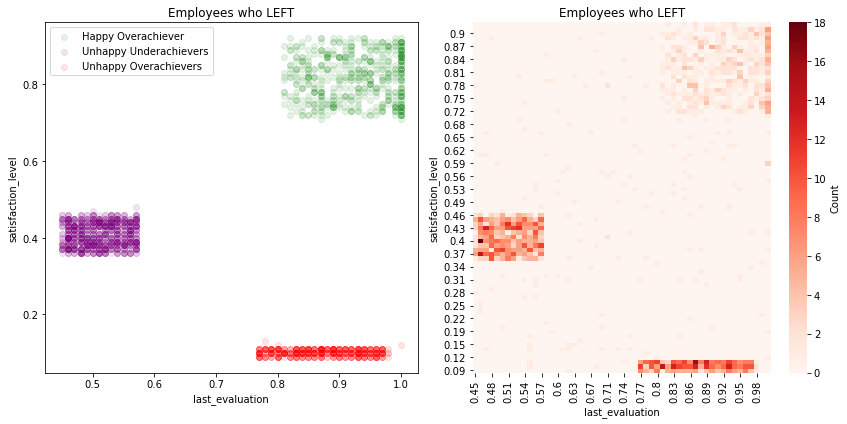

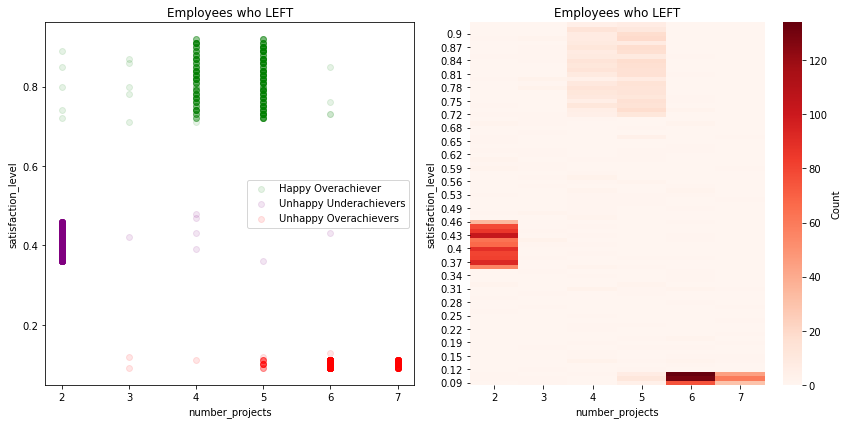

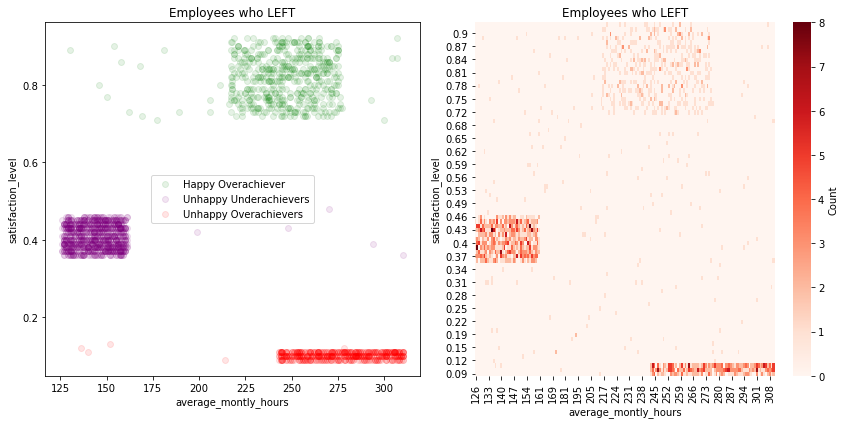

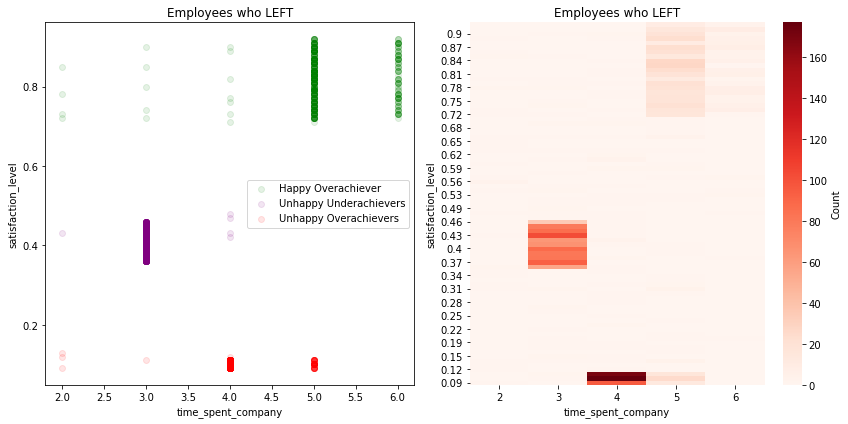

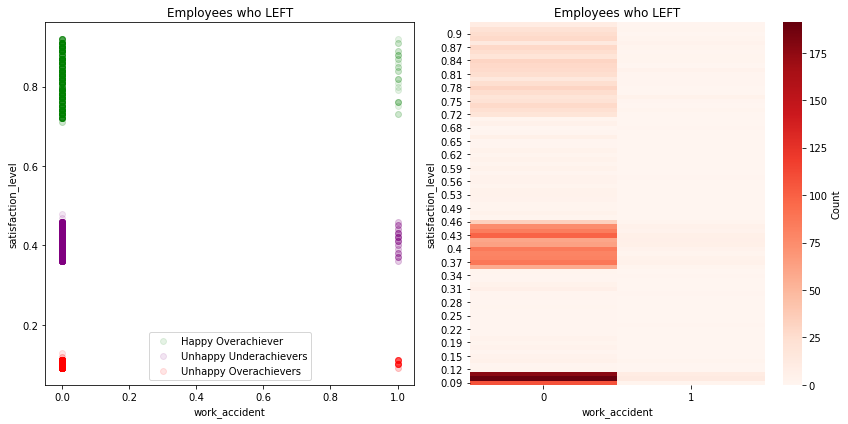

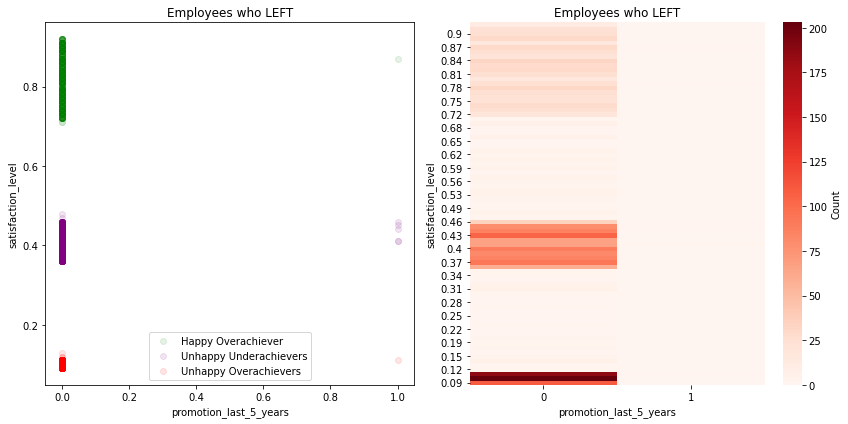

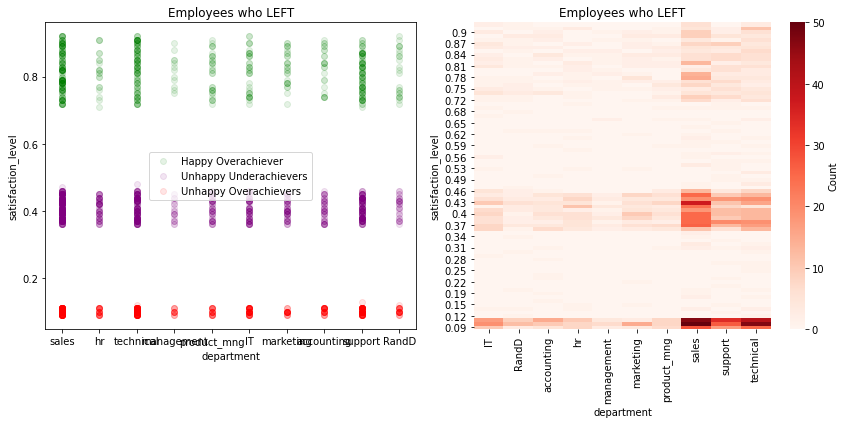

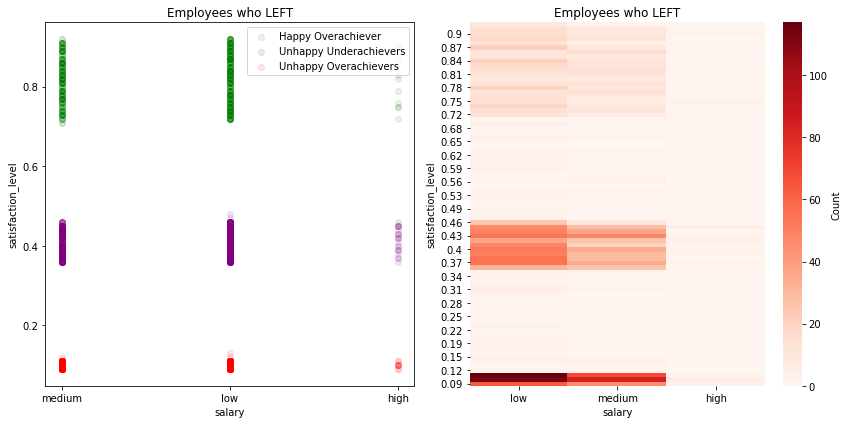

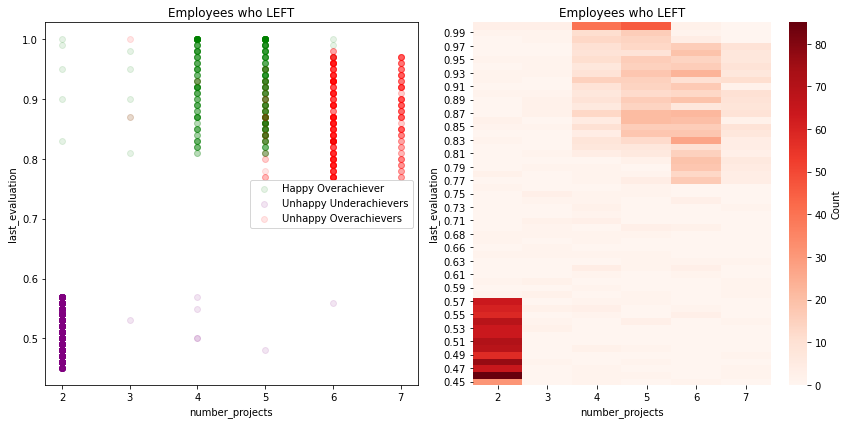

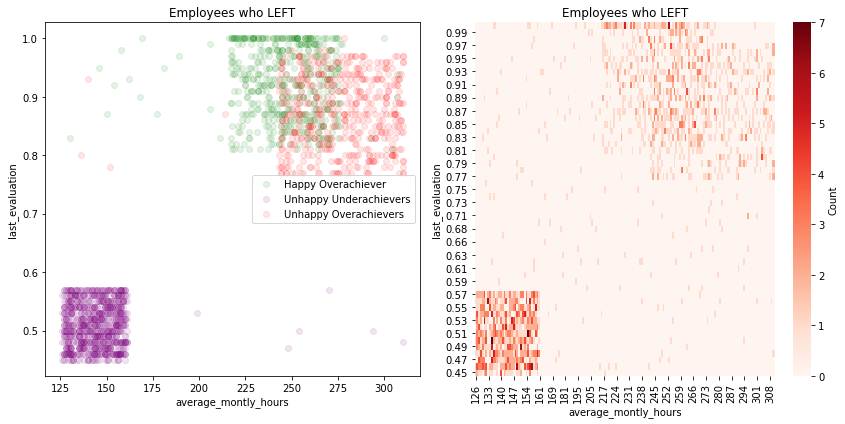

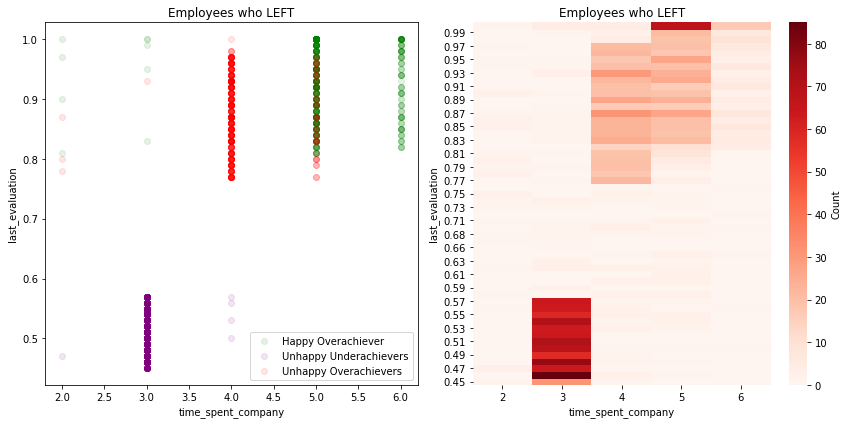

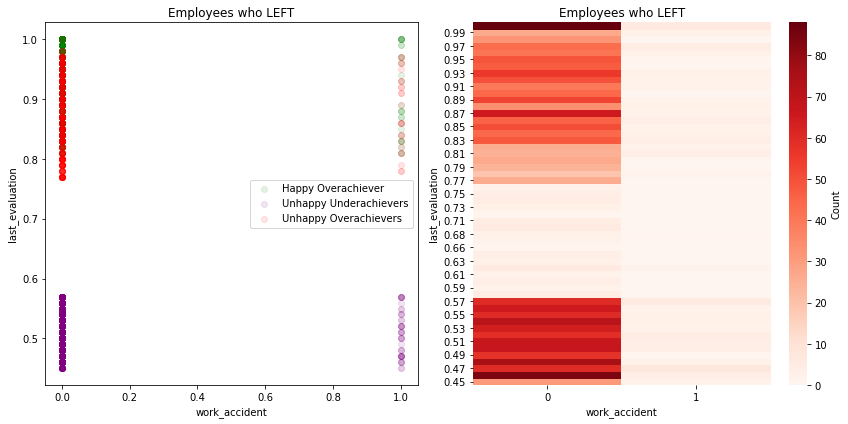

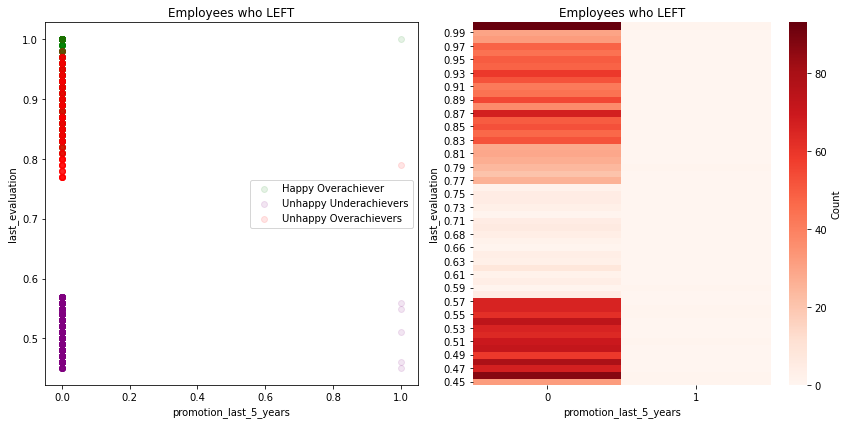

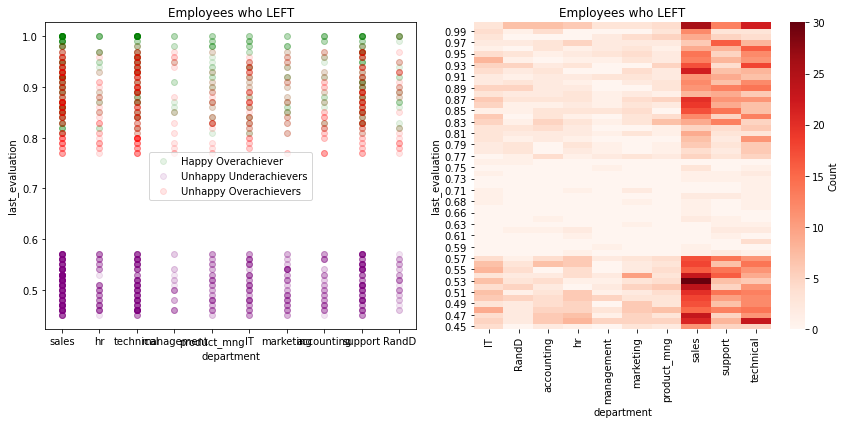

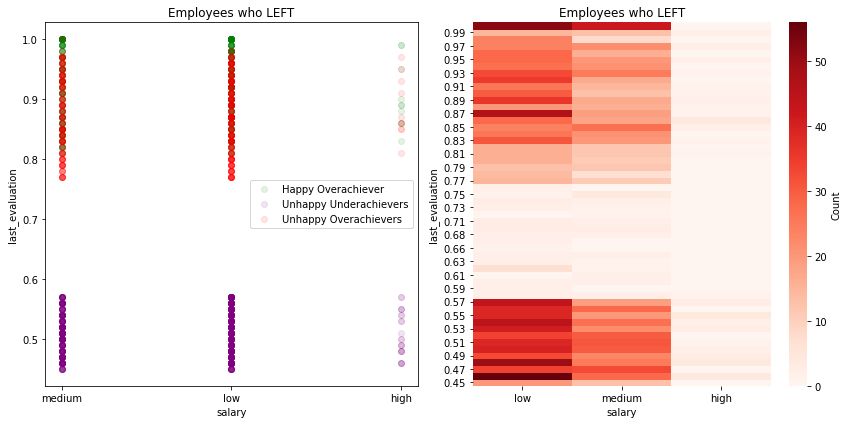

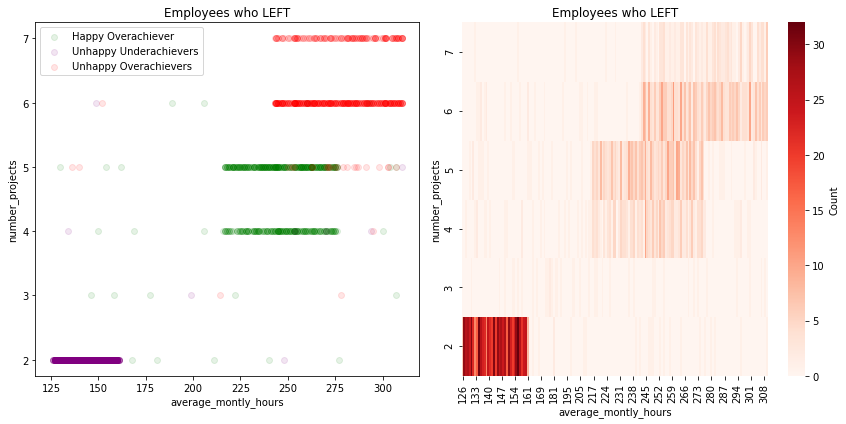

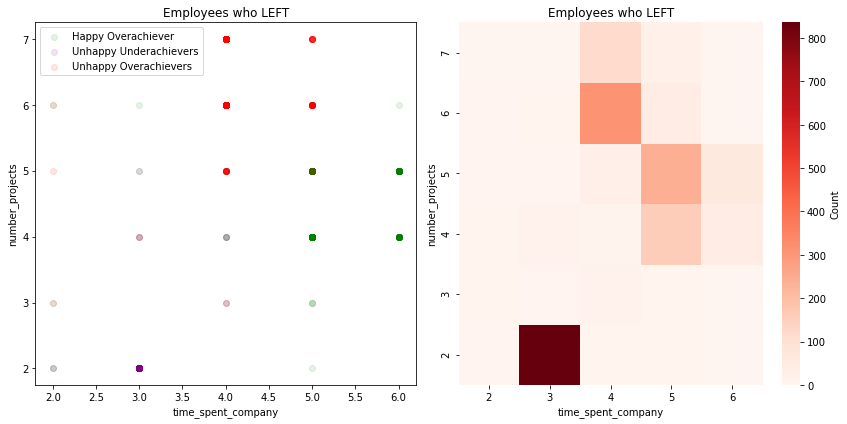

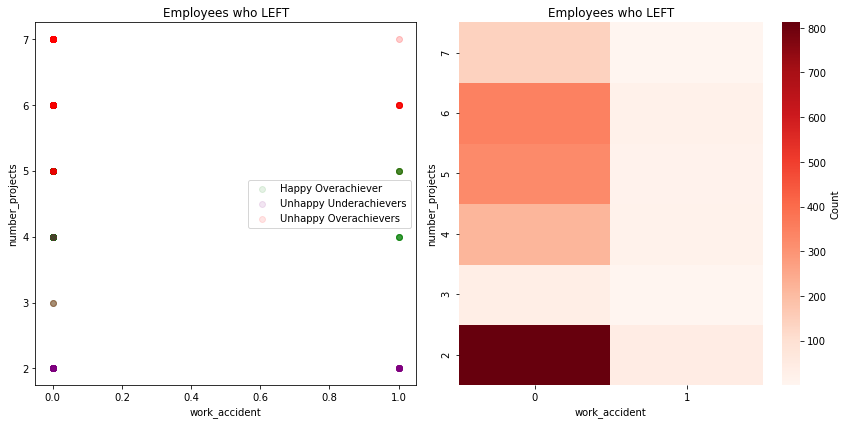

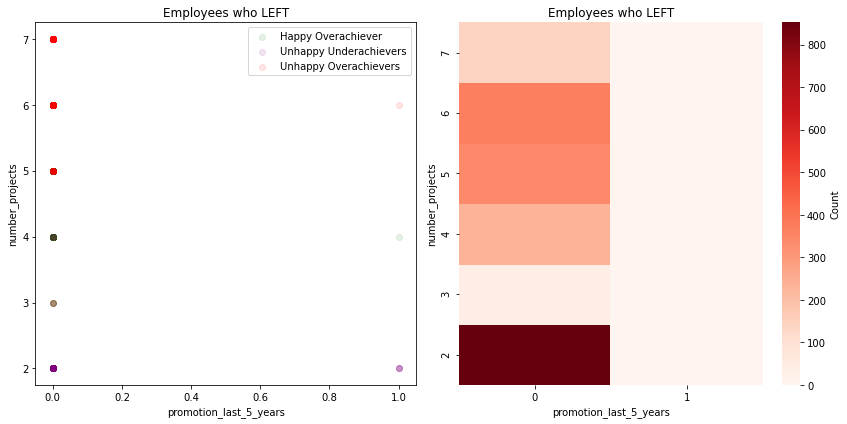

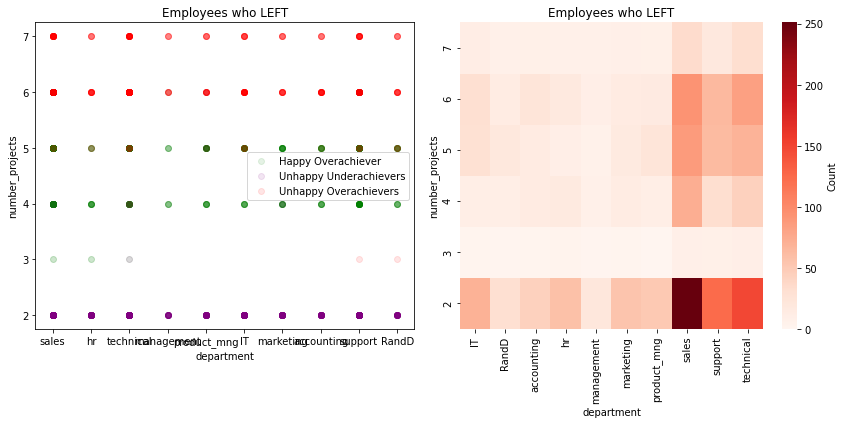

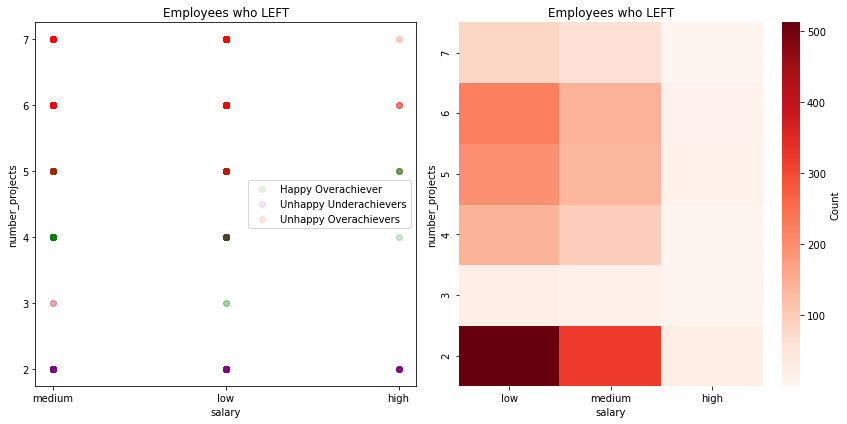

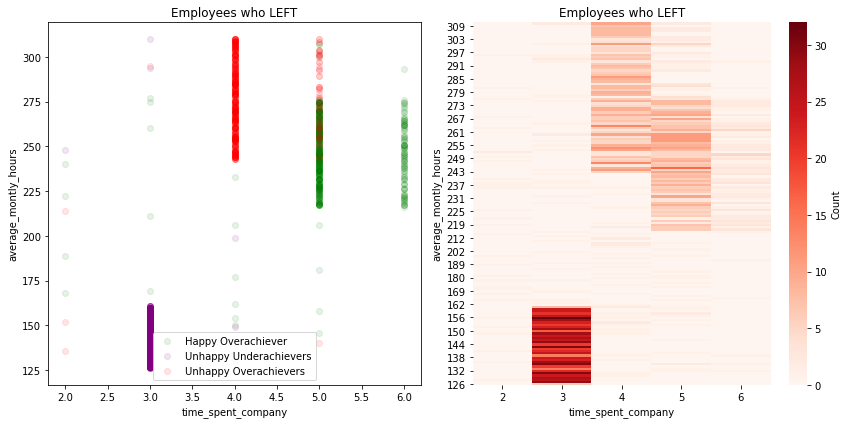

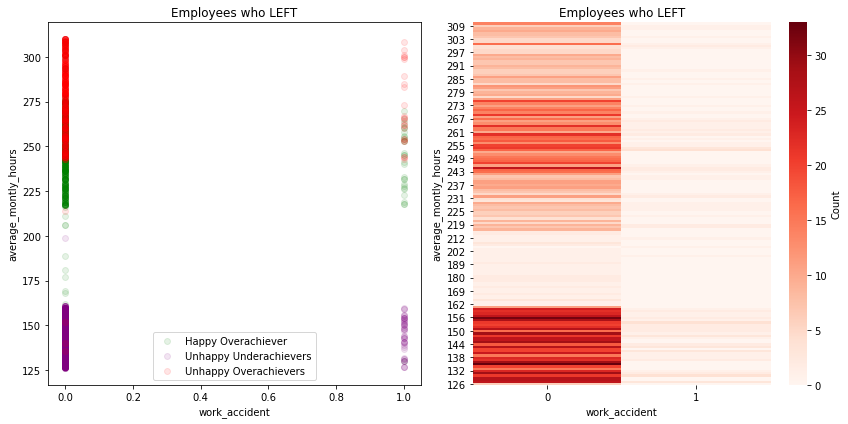

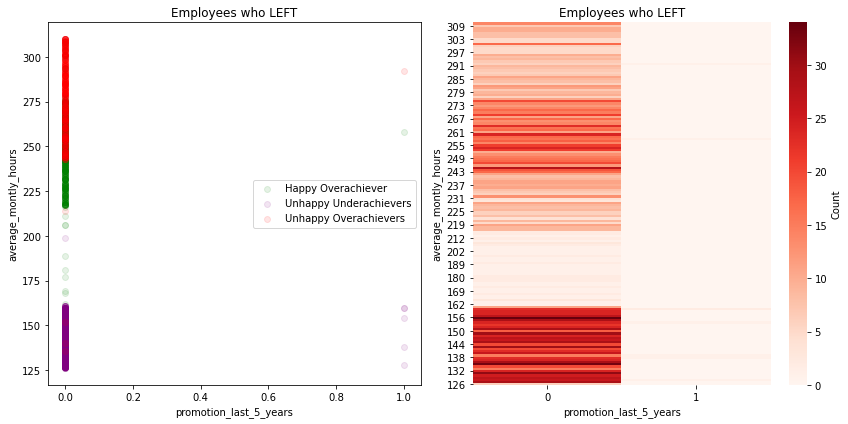

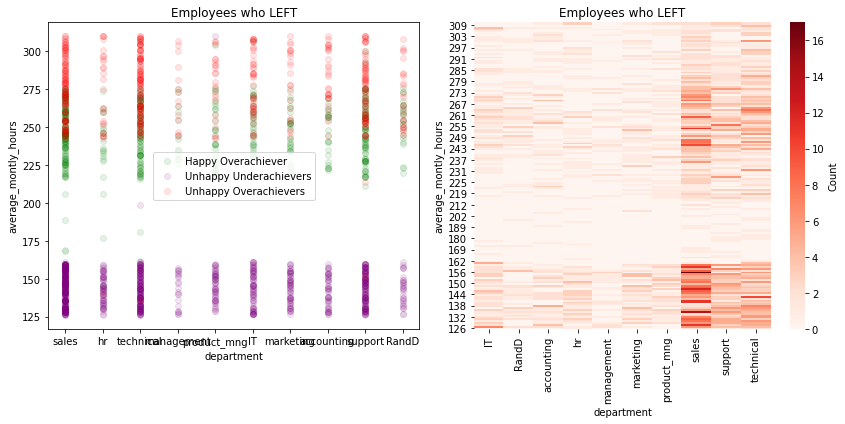

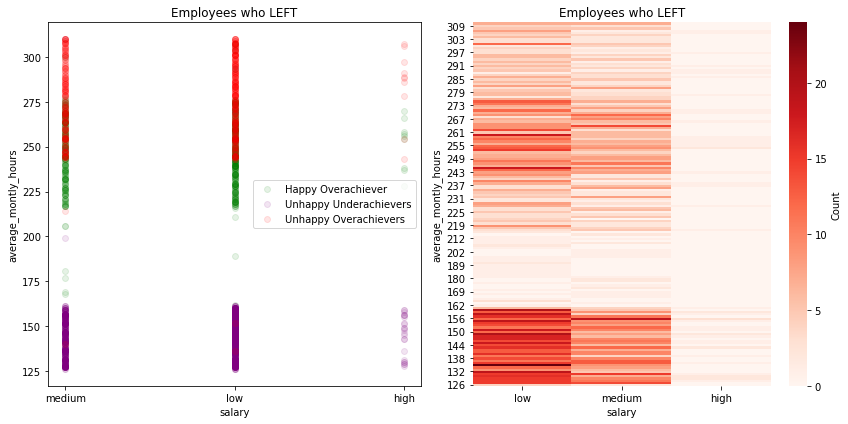

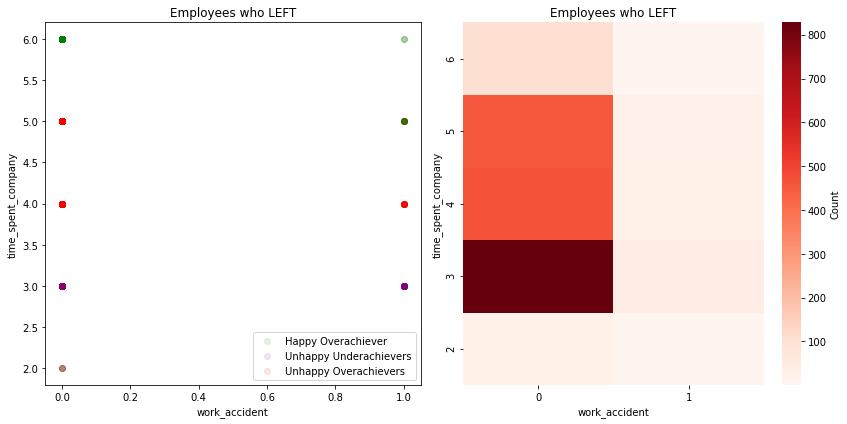

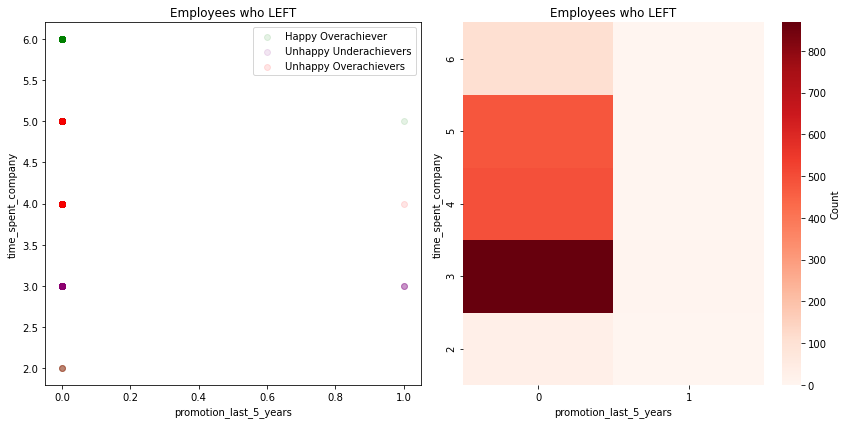

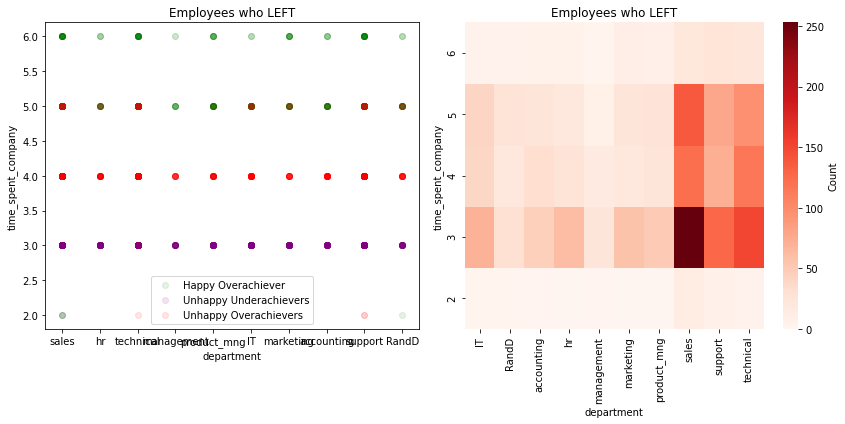

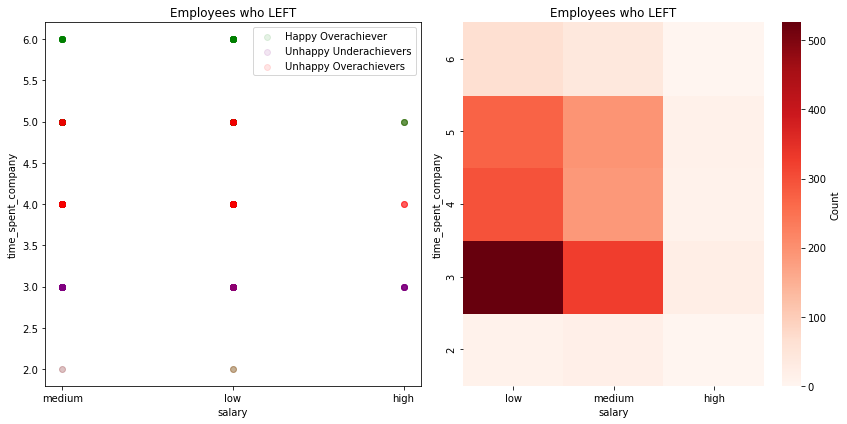

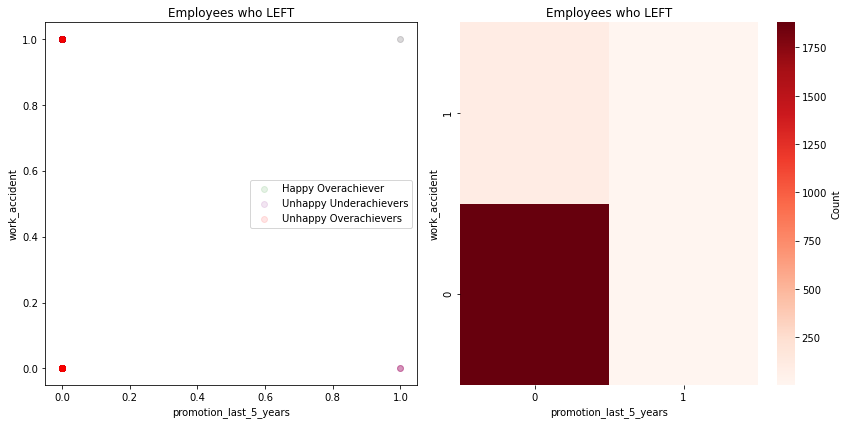

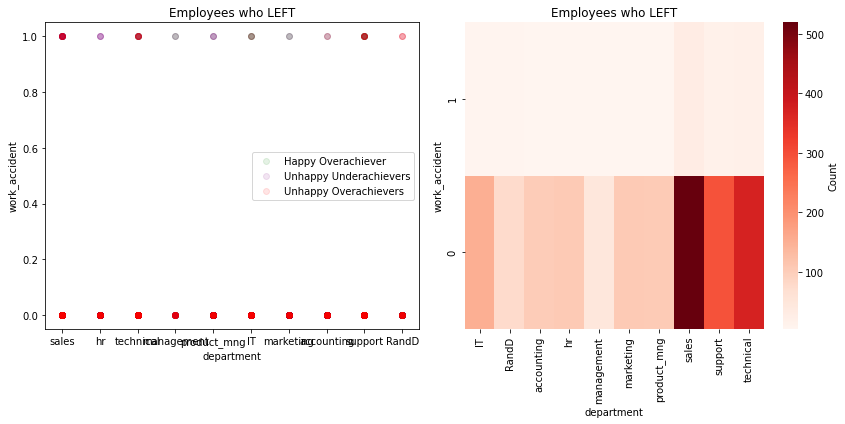

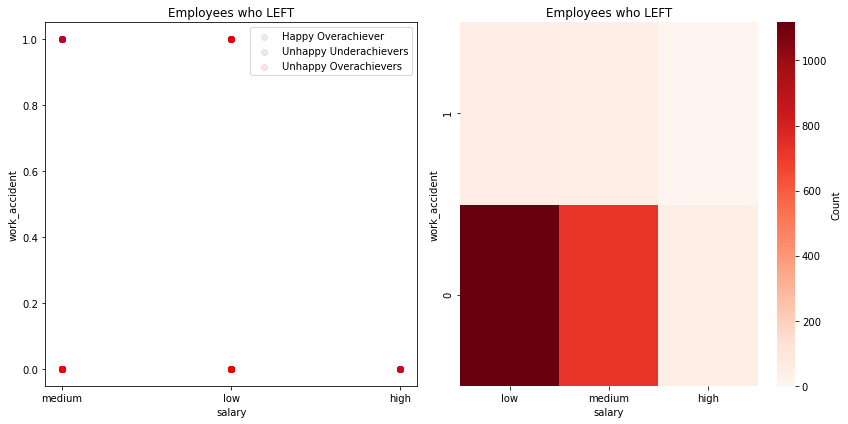

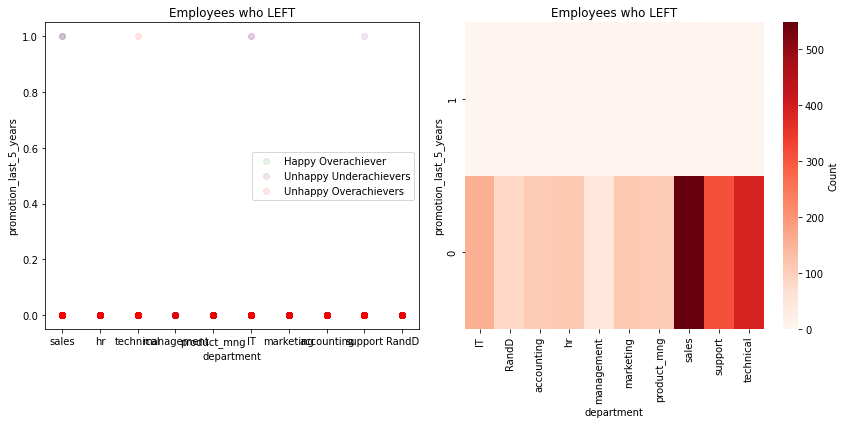

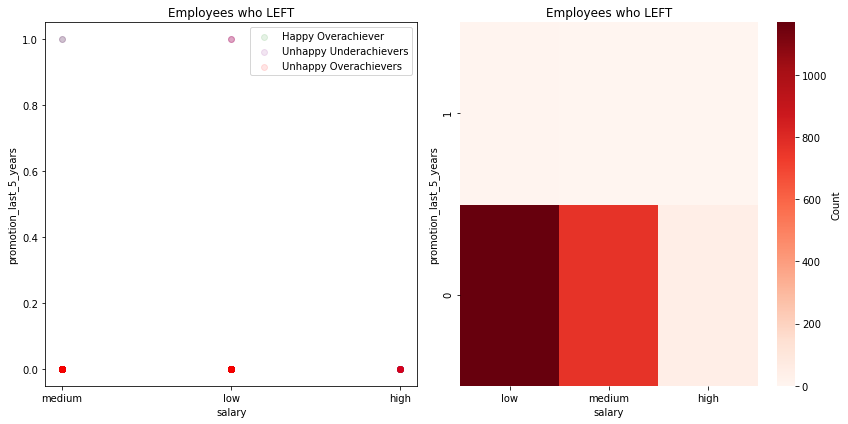

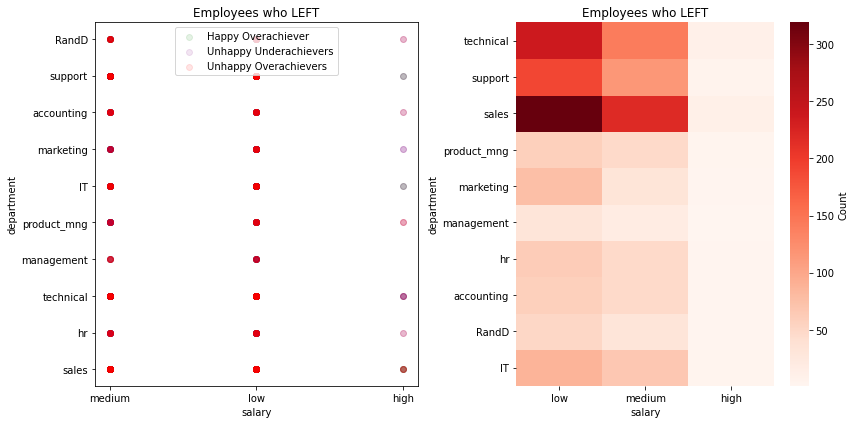

In [350]:
# Study the behavior of the 3 groups of employees who left 
# to be sure that there are no mix-ups between these groups.

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.colors as mcolors
import numpy as np

# Divide the data between employees who LEFT or STAYED
left = data[data.left_yn == 1] # data of the employees who LEFT
stayed = data[data.left_yn == 0] # data of the employees who STAYED


# Separate the data of the employees who LEFT into 3 groups,
# so to be able to track their different behavior

# - Unhappy Overachiever (UO): omega
# boolean mask for the UO
crop_mask_omega = (left["last_evaluation"] > 0.75) & (left["satisfaction_level"] < 0.15)
# dataset for the UO 
omega = left[crop_mask_omega]

# - Unhappy Underachiever: beta
# boolean mask for the UU
crop_mask_beta = (left["last_evaluation"] < 0.6) & ((left["satisfaction_level"] > 0.33) & (left["satisfaction_level"] < 0.5))
# dataset for the UU 
beta = left[crop_mask_beta]

# - Happy Overachiever: alpha
# boolean mask for the HO
crop_mask_alpha = (left["last_evaluation"] > 0.8) & (left["satisfaction_level"] > 0.7)
# dataset for the HO 
alpha = left[crop_mask_alpha]

# variables of the data (column names)
keys = data.keys().to_list() 

# Developer option, truncates the loop to 3 elements
testing = False # truncation OFF (False) or ON (True)
if testing == True:
    keys = ["satisfaction_level", "last_evaluation", "average_montly_hours"]

# Loop the variables and creates all the possible crosstabless for the data
# loop for the rows
for i, row in enumerate(keys):
    keys_second = keys[i+1:] # eliminate permutation of variables
    
    # loop for the columns
    for col in keys_second:
        
        # eliminates the crossbables between two identical variables 
        if row == col:
            pass
        
        # eliminates the "left_yn" variable
        elif (row == "left_yn") or (col == "left_yn"):
            pass
        
        # main loop
        else:
            
            # creates the crosstable for the Happy Overachievers
            alpha_data = pd.crosstab(alpha[row], alpha[col])
            alpha_data = alpha_data.fillna(0) # fill nans
            
            # creates the crosstable for the Unhappy Underachievers
            beta_data = pd.crosstab(beta[row], beta[col])
            beta_data = beta_data.fillna(0) # fill nans
            
            # creates the crosstable for the Unhappy Underachievers
            omega_data = pd.crosstab(omega[row], omega[col])
            omega_data = omega_data.fillna(0) # fill nans
            
            # creates the crosstable for all the employees who left
            left_data = pd.crosstab(left[row], left[col])
            left_data = left_data.fillna(0) # fill nans
            
            # reorders the "salary" variable from low to high
            if col == "salary":
                column_order = ['low', 'medium', 'high']
                alpha_data = alpha_data.reindex(columns=column_order)
                beta_data = beta_data.reindex(columns=column_order)
                omega_data = omega_data.reindex(columns=column_order)
                left_data = left_data.reindex(columns=column_order)
            if row == "salary":
                row_order = ['low', 'medium', 'high']
                alpha_data = alpha_data.reindex(index=row_order)
                beta_data = beta_data.reindex(index=row_order)
                omega_data = omega_data.reindex(index=row_order)
                left_data = left_data.reindex(index=row_order)
            
            
            # Plot the crosstables as scatter plot vs heatmaps, 
            # one next to the other, so to confirm that the 3 groups don't mix
            
            # Set the figure size
            plt.figure(figsize=(12, 6))

            # Subplot 1: Alpha, beta, omega scatter plots
            plt.subplot(1, 2, 1)  # Create a subplot
            plt.scatter(alpha[col], alpha[row], color='green', alpha=0.1, label='Happy Overachiever')
            plt.scatter(beta[col], beta[row], color='purple', alpha=0.1, label='Unhappy Underachievers')
            plt.scatter(omega[col], omega[row], color='red', alpha=0.1, label='Unhappy Overachievers')
            plt.xlabel(col)  # Set the x-axis label
            plt.ylabel(row)  # Set the y-axis label
            plt.title('Employees who LEFT')  # Set the title
            plt.legend()  # Show the legend

            # Subplot 2: Heatmap
            plt.subplot(1, 2, 2)  # Create a subplot
            ax2 = sns.heatmap(left_data, cmap="Reds", cbar_kws={'label': 'Count'})  # Create the heatmap
            ax2.invert_yaxis()  # Flip the y-axis
            plt.title("Employees who LEFT")  # Set the title

            plt.tight_layout()  # Adjust the spacing between subplots

            plt.show()  # Display the pair of heatmaps

<function matplotlib.pyplot.show(close=None, block=None)>

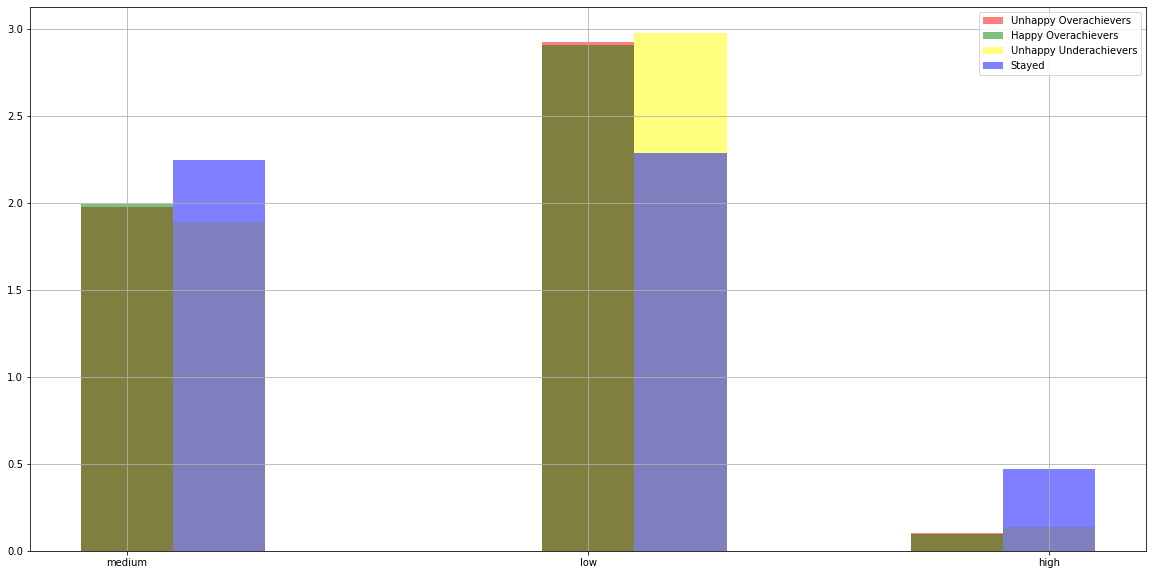

In [355]:
# check the difference in salary between the 3 groups and the employees who stayed.
plt.figure(figsize=(20,10))
omega.salary.hist(density=1, label="Unhappy Overachievers", color="Red", alpha=0.5, align="left")
alpha.salary.hist(density=1, label="Happy Overachievers", color="Green", alpha=0.5, align="left")
beta.salary.hist(density=1, label="Unhappy Underachievers", color="Yellow", alpha=0.5, align="right")
stayed.salary.hist(density=1, label="Stayed", color="Blue", alpha=0.5, align="right")
plt.legend()

plt.show

It seems there is no difference in salary between the 3 groups of employees who left, and the salary is significatively lower than for the employees who stayed. Therefore, the Unhappy Overachievers group probably left because of feeling underappreciated for their work. Moreover, this group is very present in the 6 or 7 projects workload, and high hours per month. This fragmentation of work between different projects, together with high hours per month, can contribute to burnout and depression. Moreover, this is the group who declared to be more unhappy, so they even vented their problems with HR before leaving. It is possible that in the company there is not a good communication between employees and management, or employees that are suffering are not listened enough. 

<AxesSubplot:>

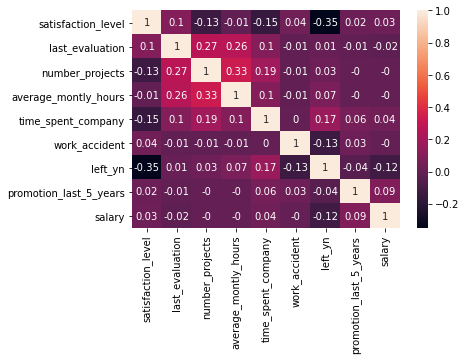

In [43]:
# Creates a correlation table for the variables of the data,
# except for the categorical "department" variable 
# to see as an ensemble straight correlations

import seaborn as sns # package for plotting heatmap

# Replace the categorical values of the "salary" table with numerical values
# Create a mapping dictionary
salary_mapping = {'low': 0, 'medium': 0.5, 'high': 1}
# check if the replacement already happened, so to be able to run the code multiple times
if isinstance(data['salary'].dtype, pd.CategoricalDtype):
    # Replace the values in the 'salary' column using the mapping
    data['salary'] = data['salary'].replace(salary_mapping)

data.corr() # correlation matrix
sns.heatmap(data.corr().round(2), annot = True ) # correlation heatmap

<AxesSubplot:>

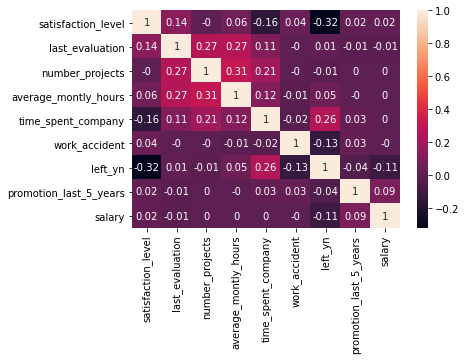

In [16]:
# Creates a correlation matrix with 'spearman' method
data.corr(method='spearman') # correlation matrix with 'spearman' method
# correlation heatmap with 'spearman' method
sns.heatmap(data.corr(method='spearman').round(2), annot = True )

<AxesSubplot:>

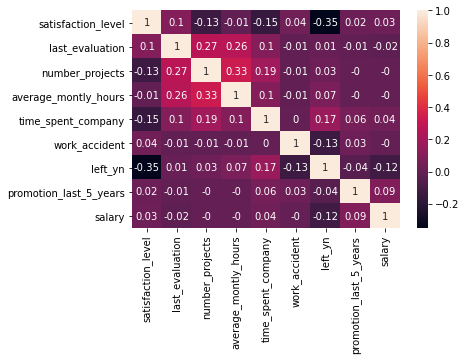

In [45]:
# Creates a correlation matrix with 'pointbiserialr' method

# import the method, not available in Pandas
from scipy.stats import pointbiserialr

# Replace the categorical values of the "salary" table with numerical values
# Create a mapping dictionary
salary_mapping = {'low': 0, 'medium': 0.5, 'high': 1}
# check if the replacement already happened, so to be able to run the code multiple times
if isinstance(data['salary'].dtype, pd.CategoricalDtype):
    # Replace the values in the 'salary' column using the mapping
    data['salary'] = data['salary'].replace(salary_mapping)

# Create an empty correlation matrix
correlation_matrix = pd.DataFrame(
                        index=data.columns.drop('department'), 
                        columns=data.columns.drop('department')
                        )

# Iterate over the variables
for col1 in data.columns.drop('department'):
    for col2 in data.columns.drop('department'):
        # Calculate point-biserial correlation
        rpb, _ = pointbiserialr(data[col1], data[col2])
        correlation_matrix.loc[col1, col2] = rpb

# Convert correlation values to numeric type
correlation_matrix = correlation_matrix.astype(float)

# Print the correlation matrix and heatmap
# print(correlation_matrix)
sns.heatmap(correlation_matrix.round(2), annot=True)

The most evident correlation is the inverse correlation between satisfaction level and leaving, around -0.35. This means that employees that were considering leaving because unhappy spoke with HR about this in advance, and no effective remedies were proposed. So, a very important lesson here is that **management should listen to their employees.** 